In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore')


# 1. Import The Raw Data

In [2]:
# Loading the data
df = pd.read_csv(r'Data\Car Price Dataset.csv')

# print the shape
print(df.shape)

#runs the first 5 rows
df.head()


(205, 26)


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# 2. Data Preprocessing

## 2-1. EDA

In [5]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [6]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} Types {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature car_ID :205
The number of values for feature symboling :6 Types [-2 -1  0  1  2  3]
The number of values for feature CarName :147
The number of values for feature fueltype :2 Types ['diesel' 'gas']
The number of values for feature aspiration :2 Types ['std' 'turbo']
The number of values for feature doornumber :2 Types ['four' 'two']
The number of values for feature carbody :5 Types ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel :3 Types ['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation :2 Types ['front' 'rear']
The number of values for feature wheelbase :53
The number of values for feature carlength :75
The number of values for feature carwidth :44
The number of values for feature carheight :49
The number of values for feature curbweight :171
The number of values for feature enginetype :7 Types ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
The number of values for feature cylindernu

In [7]:
# Checking for null values

df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## 2-2. Ways of dealing with missing data
    1. Delete the whole observation
    2. Replace the NULL value with another value (mean, rolling mean, last day value, closest day value, mode, median, zero, etc)

In [8]:
# manually creating null values
df['price 2'] = df['price']
df['price 2'].iloc[0:5] = np.nan


# updating with the mean
df['price 2'][df['price 2'].isna()] = df['price 2'].mean()

df.head(10)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   
5        sedan        fwd          front       99.8      177.3      66.3   
6        sedan        fwd          front      105.8      192.7      71.4   
7        wagon        fwd          front      105.8      192.7      71.4   
8        sedan        fwd          front      105.8      192.7      71.4   
9    hatchback        4wd          front       99.5      178.2      67.9   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   
5       53.1        2507        ohc           five         136       mpfi   
6       55.7        2844        ohc           five         136       mpfi   
7       55.7        2954        ohc           five         136       mpfi   
8       55.9        3086        ohc           five         131       mpfi   
9       52.0        3053        ohc           five         131       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   
5       3.19    3.40               8.5         110     5500       19   
6       3.19    3.40               8.5         110     5500       19   
7       3.19    3.40               8.5         110     5500       19   
8       3.13    3.40               8.3         140     5500       17   
9       3.13    3.40               7.0         160     5500       16   

   highwaympg      price       price 2  
0          27  13495.000  13219.153335  
1          27  16500.000  13219.153335  
2          26  16500.000  13219.153335  
3          30  13950.000  13219.153335  
4          22  17450.000  13219.153335  
5          25  15250.000  15250.000000  
6          25  17710.000  17710.000000  
7          25  18920.000  18920.000000  
8          20  23875.000  23875.000000  
9          22  17859.167  17859.167000

In [9]:
# dropping the column
del df['price 2']

df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

# 3. Investigating the numeric values with scatterplots

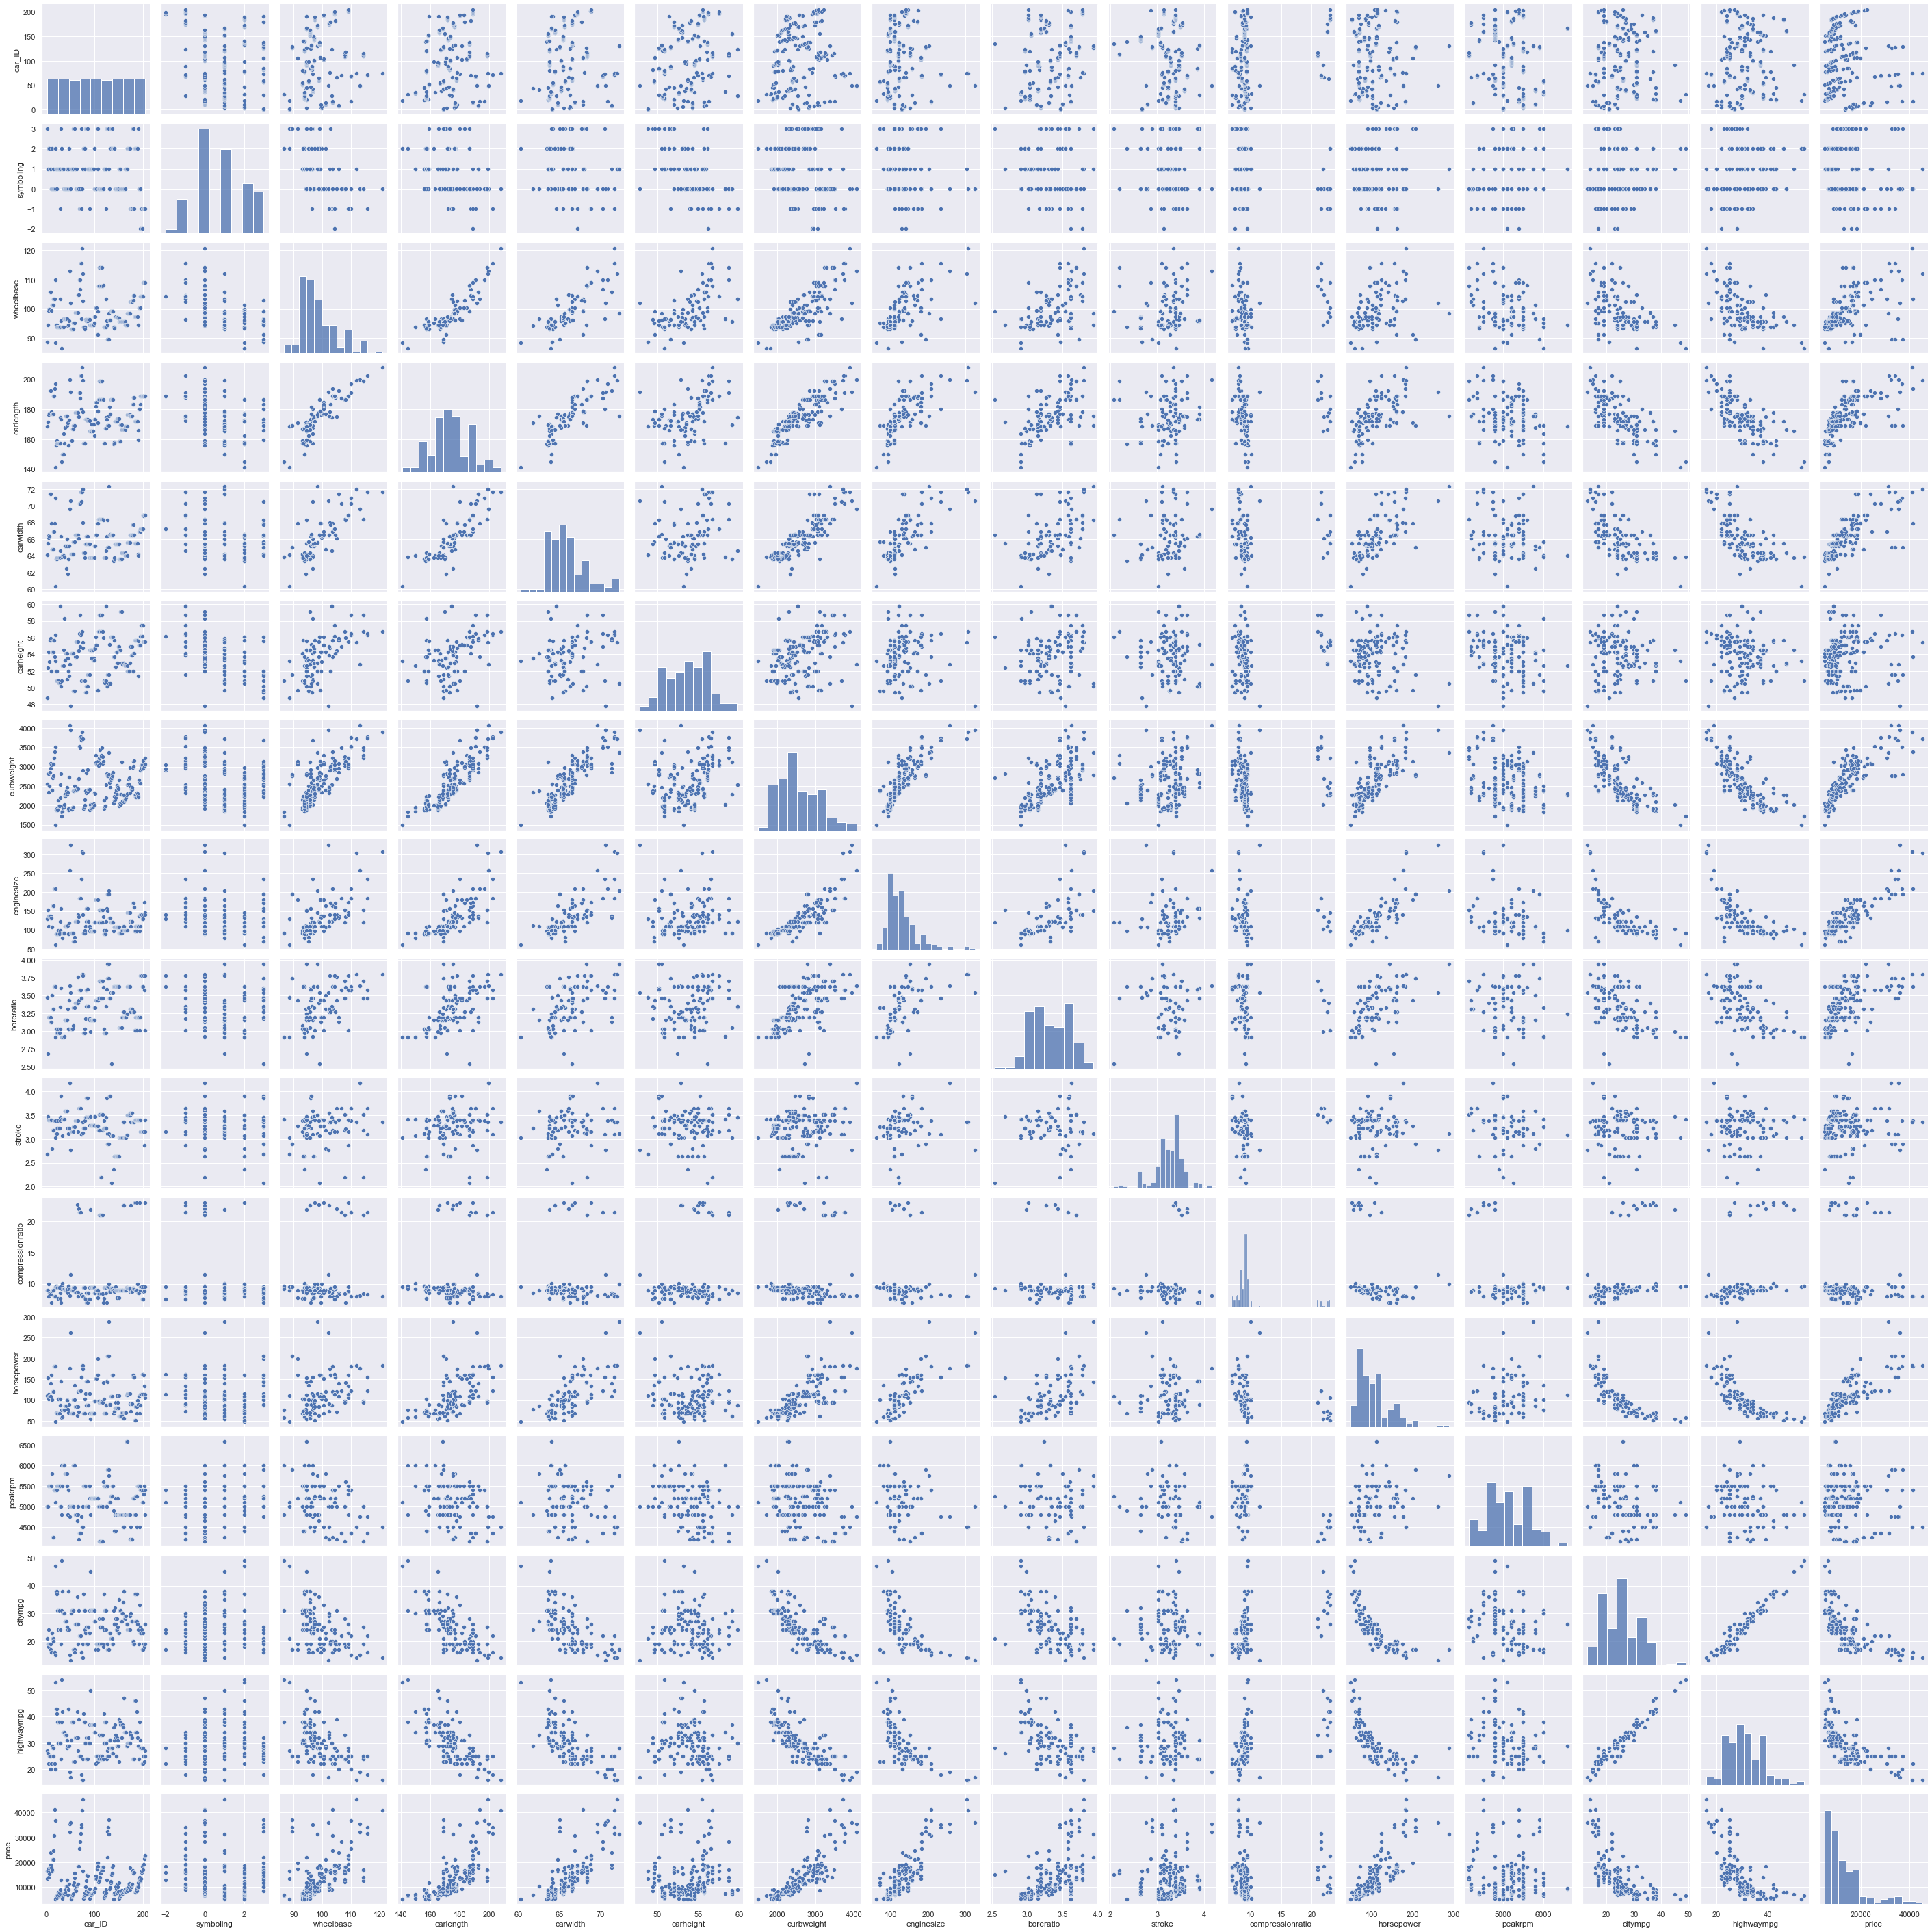

In [10]:
# Example 1 - Visualize the data using seaborn Pairplots

Pairplot = sns.pairplot(df)

In [11]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [12]:
categorical = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
numeric = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

car_body = ['doornumber','wheelbase','carlength','carwidth','carheight','curbweight']
Engine = ['aspiration','enginelocation','enginetype','cylindernumber','enginesize','boreratio','stroke']
Fuel = ['fueltype','fuelsystem','citympg','highwaympg']

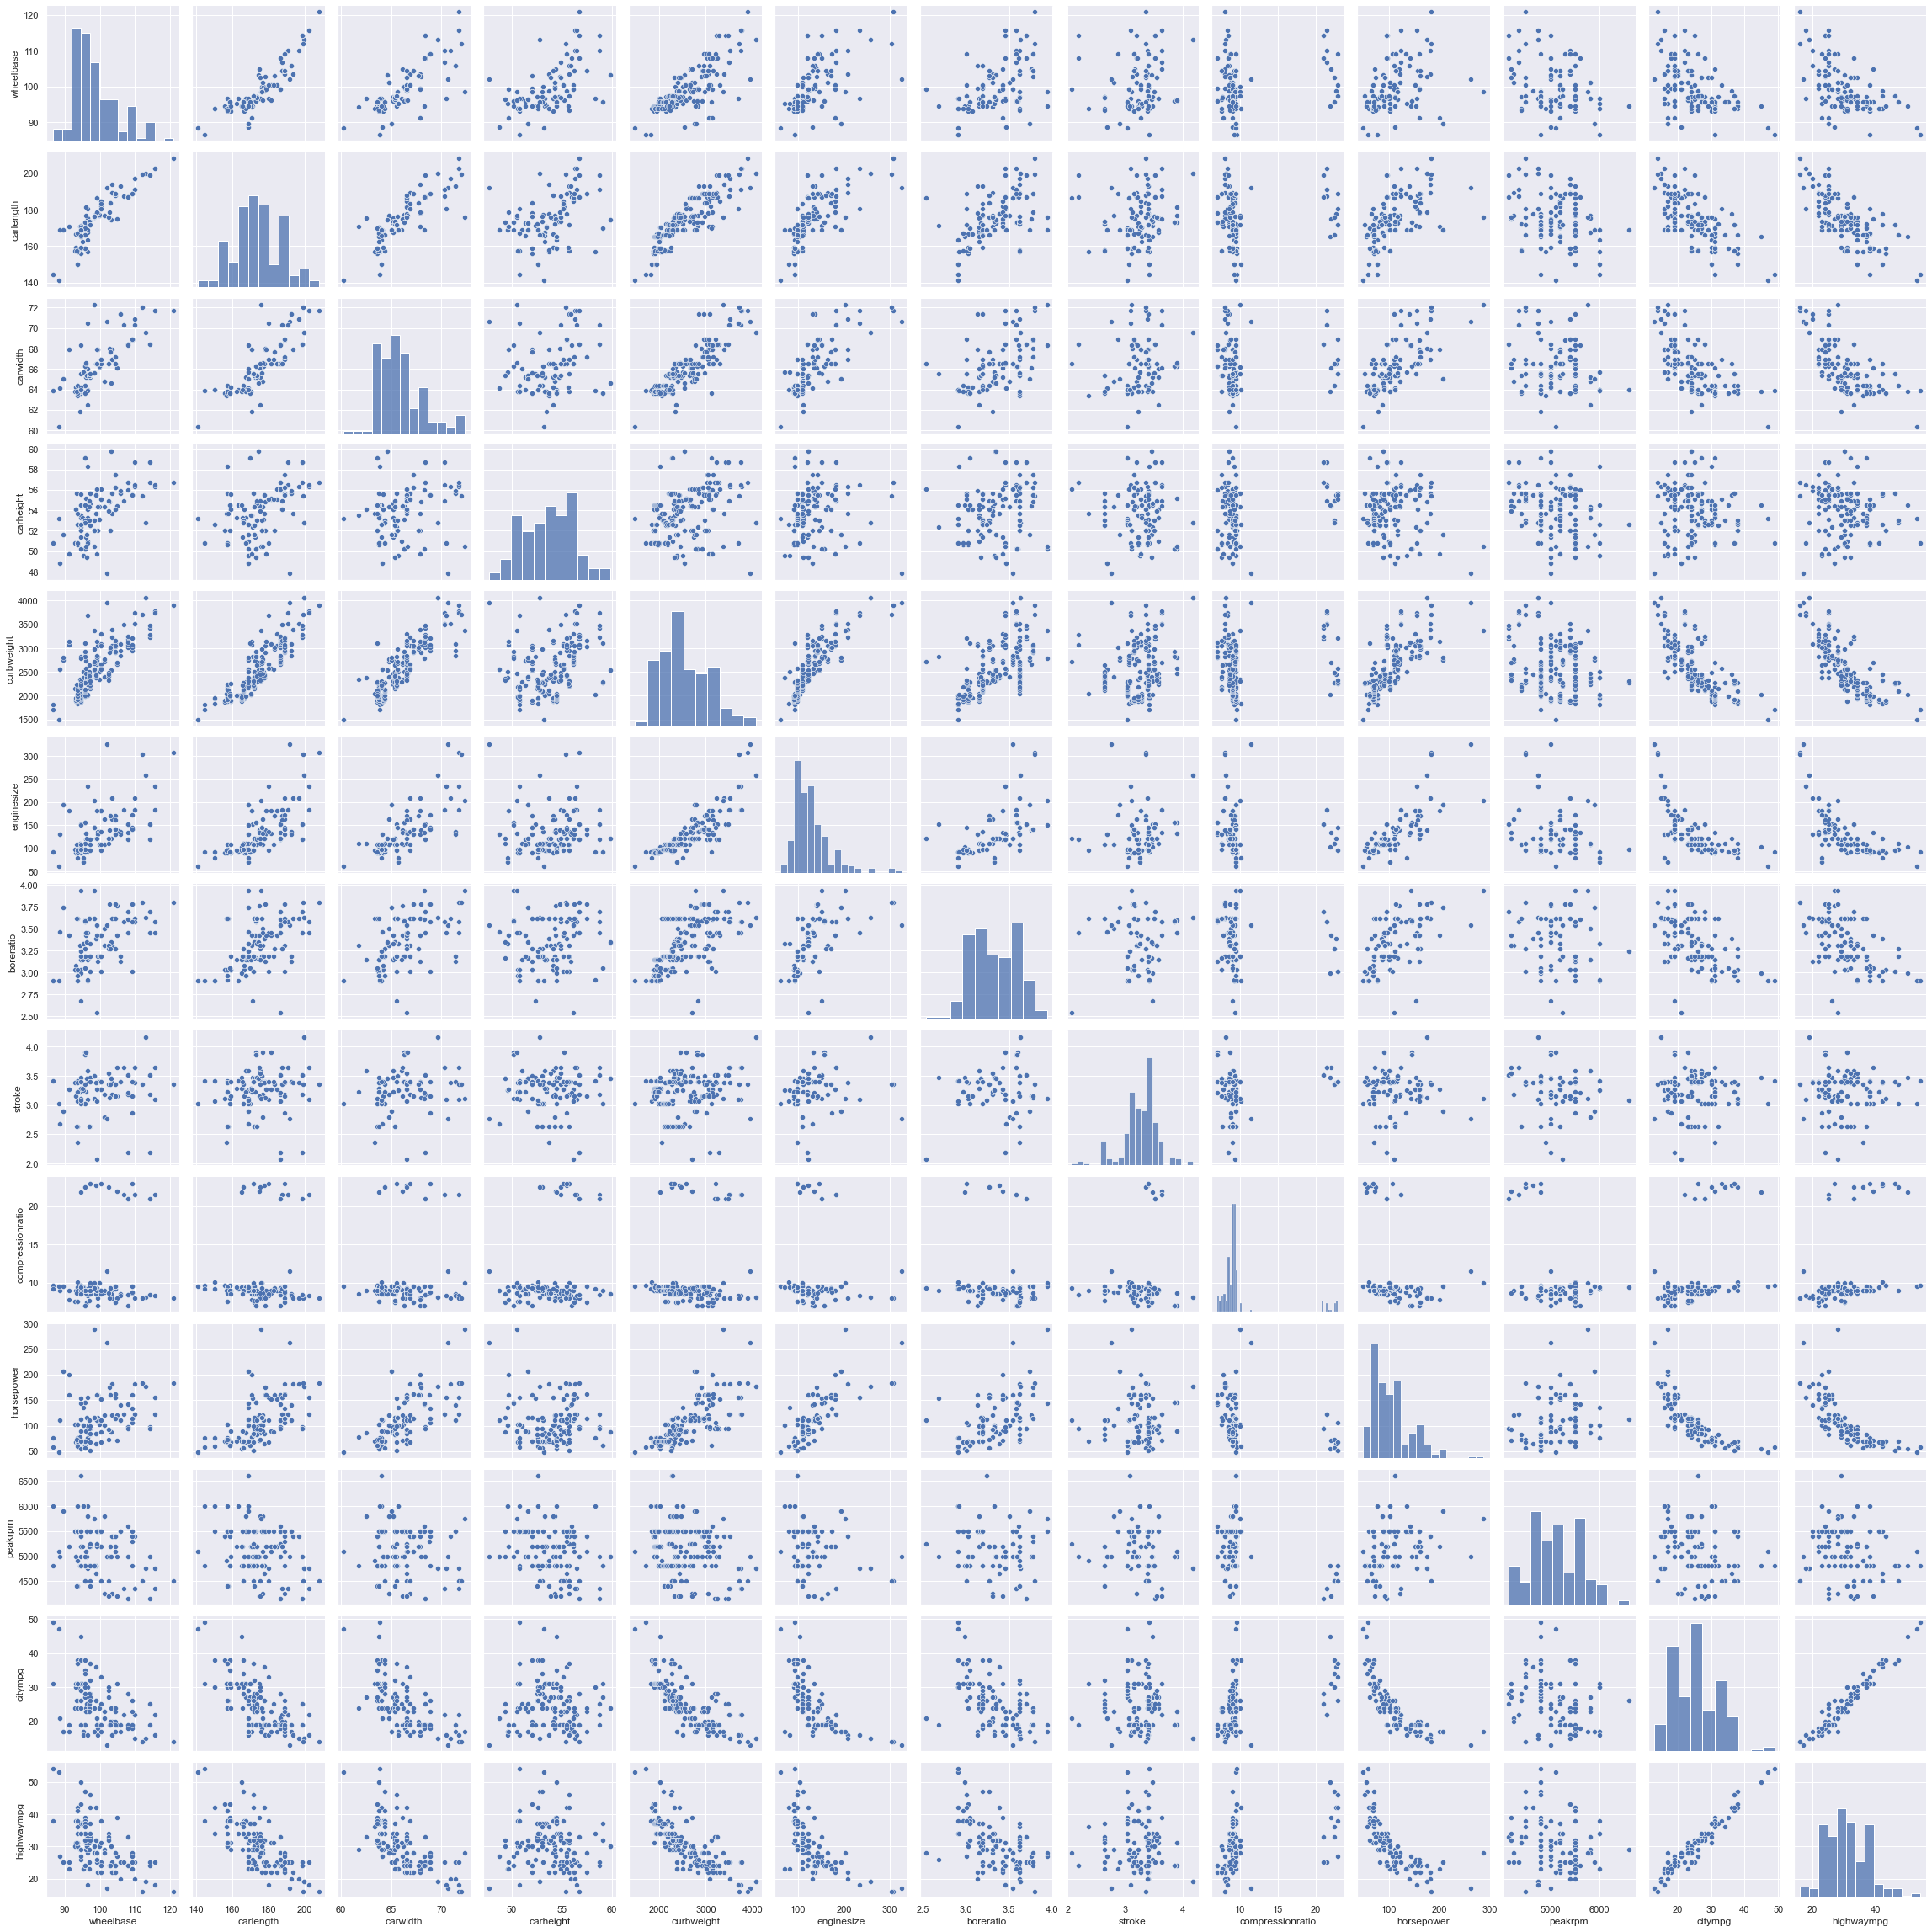

In [13]:
sns.pairplot(df[numeric])

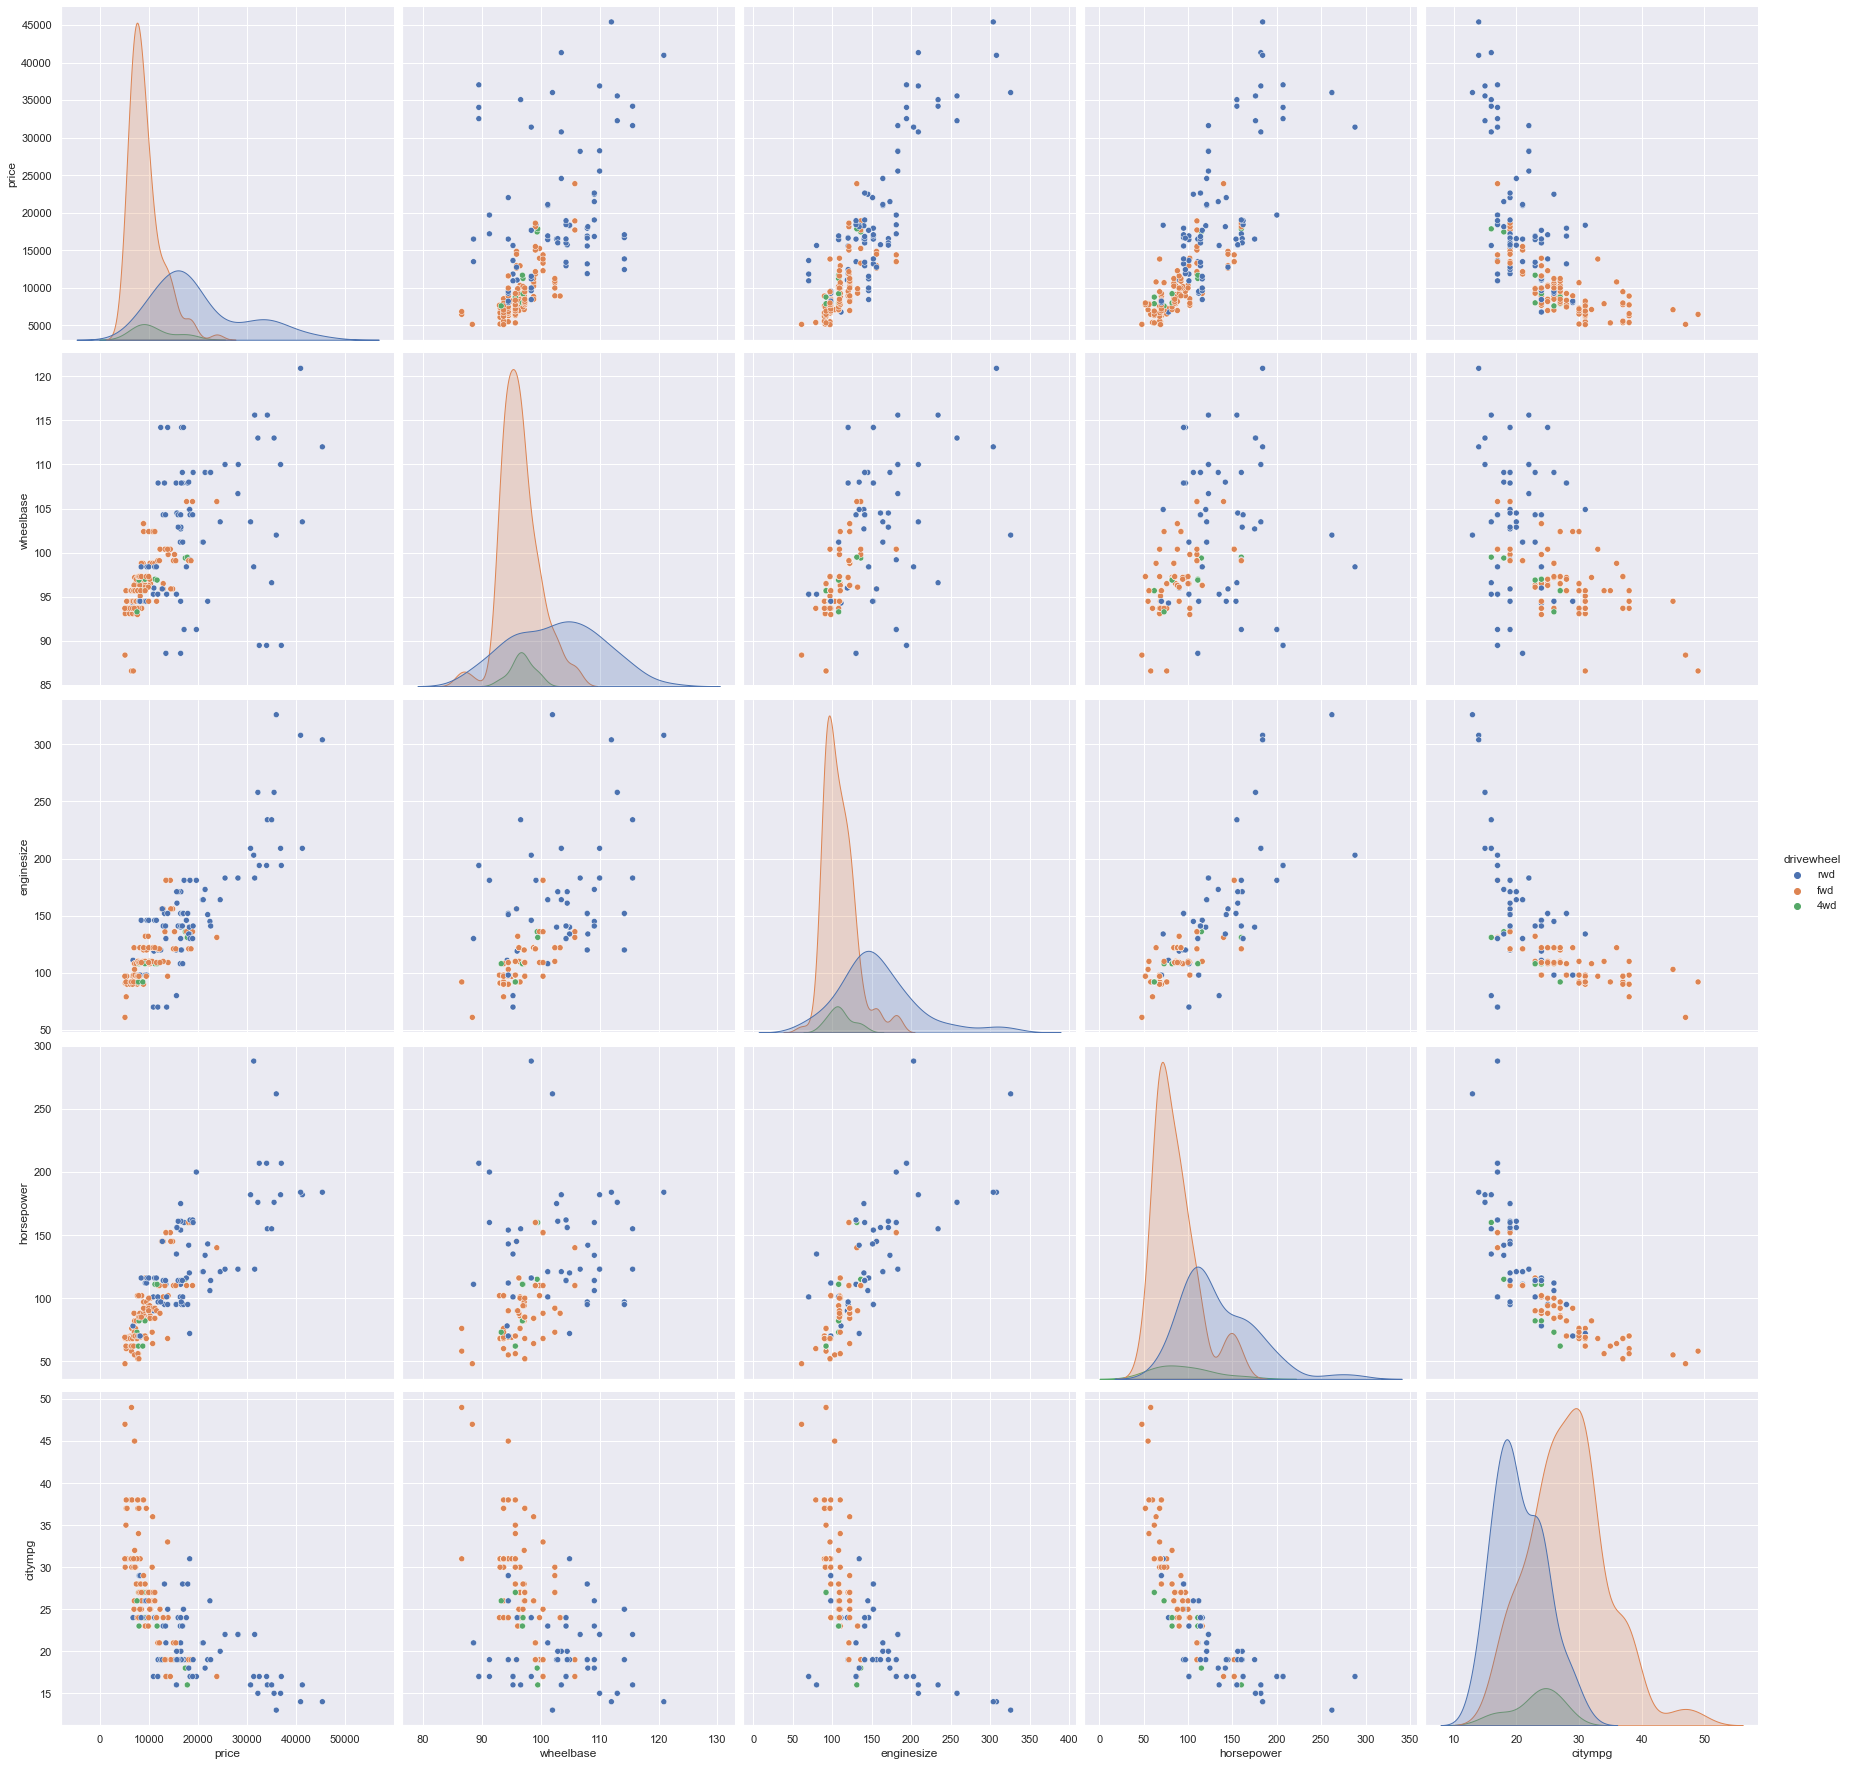

In [14]:
# Numeric -- hue=categorical feature

sns.pairplot(df[['price', 'wheelbase', 'enginesize','horsepower','citympg','drivewheel']], hue = 'drivewheel', height = 5)

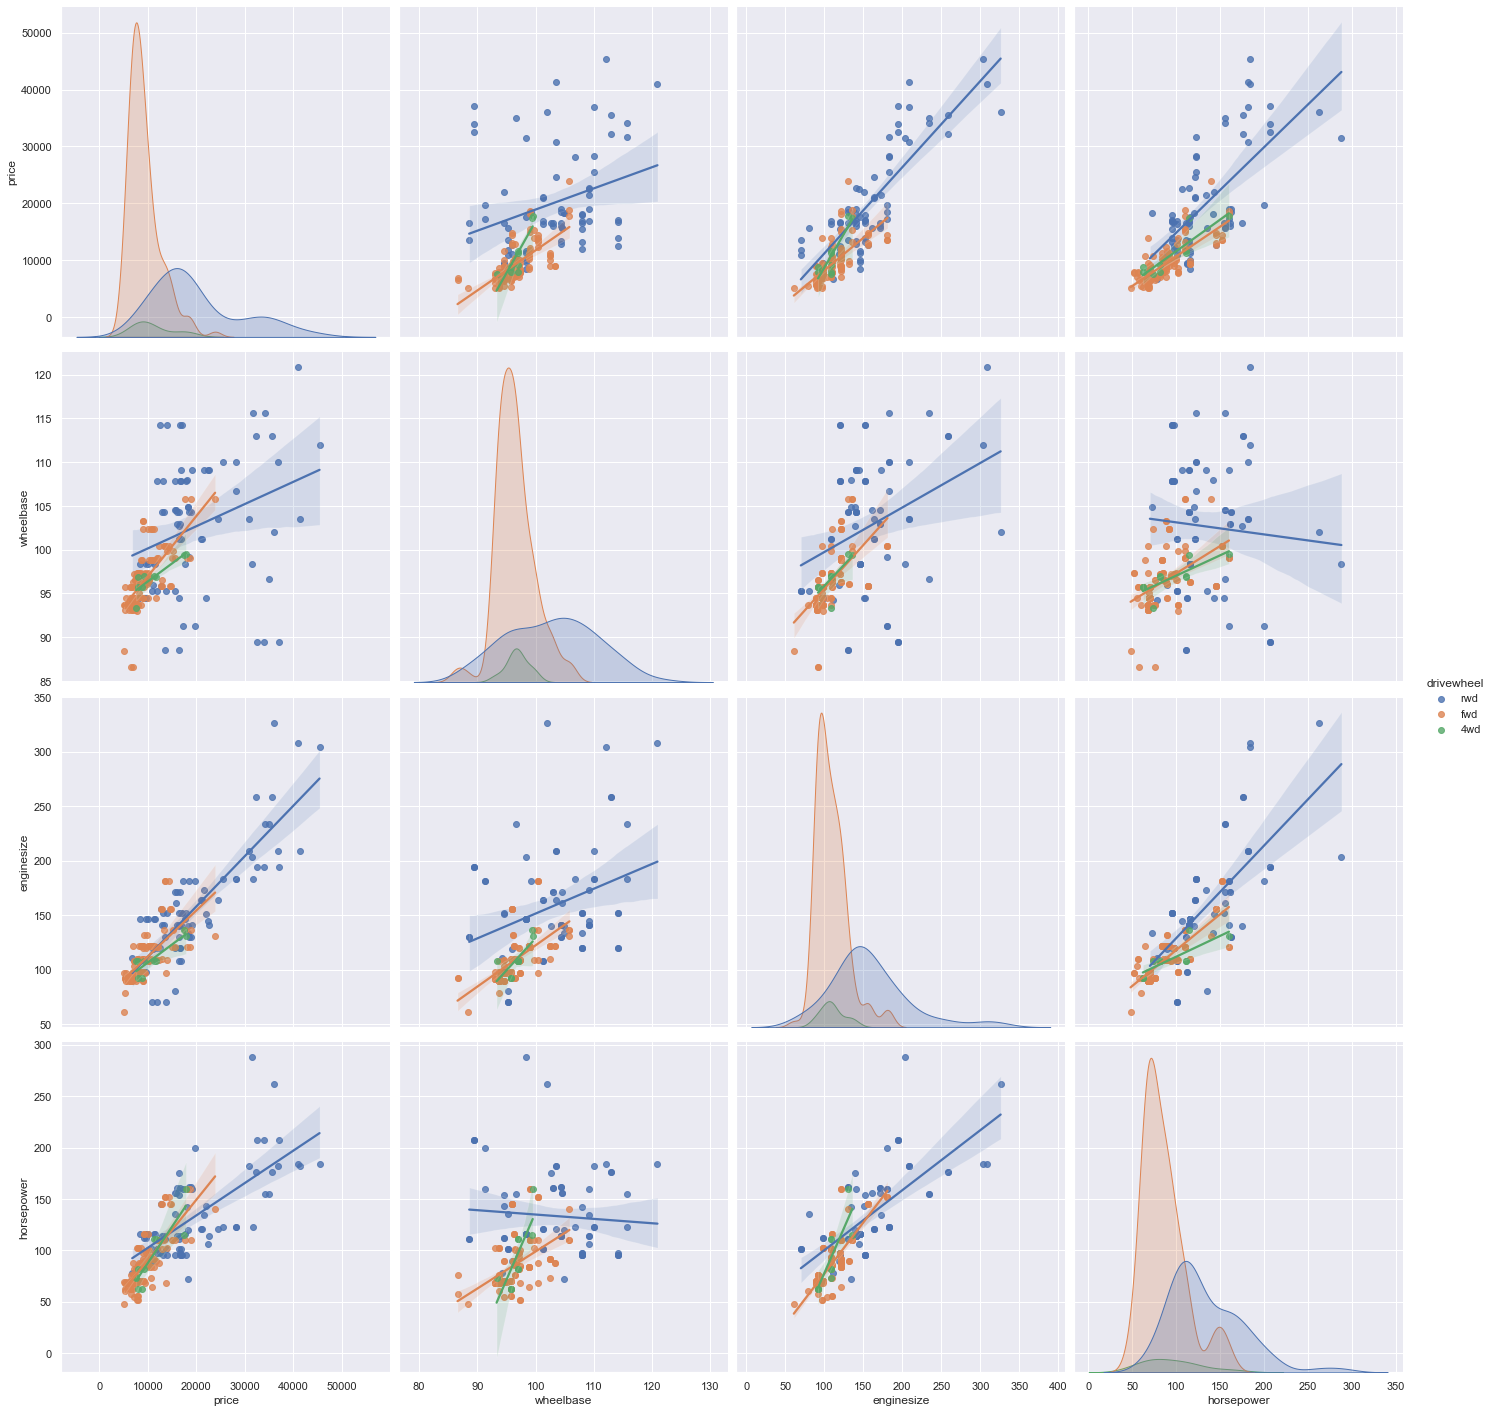

In [15]:
#kind= kde/reg/hist

sns.pairplot(df[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5, kind="reg")

<AxesSubplot:xlabel='horsepower', ylabel='price'>

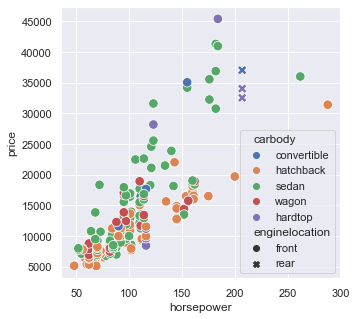

In [16]:
#Relationship between price and horsepower by carbody

sns.scatterplot(x="horsepower", y="price", data=df, hue = 'carbody', style = 'enginelocation', s=90)

# 4. Investigating the categorical data

carbody         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback  10376.652386
3        sedan  14344.270833
4        wagon  12371.960000

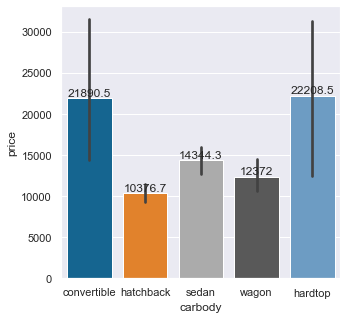

In [18]:
# Example 5 - Average price by carbody

plt.style.use("tableau-colorblind10")

ax = sns.barplot(x="carbody", y="price", data=df)
ax.bar_label(ax.containers[0])

# Notes: 
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default

df[['carbody', 'price']].groupby('carbody', as_index = False).agg({'price':'mean'})

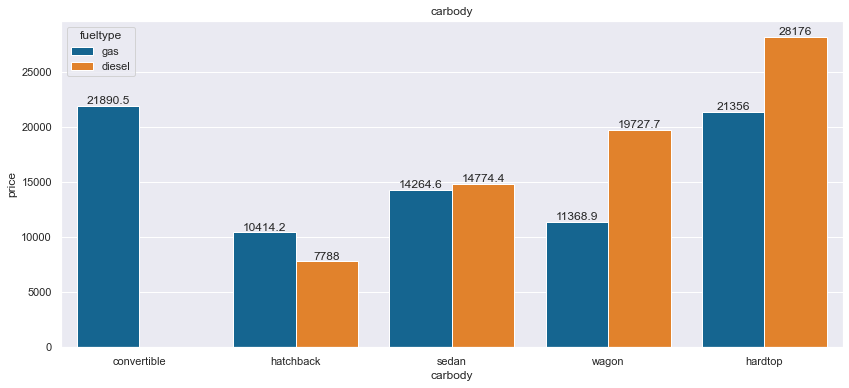

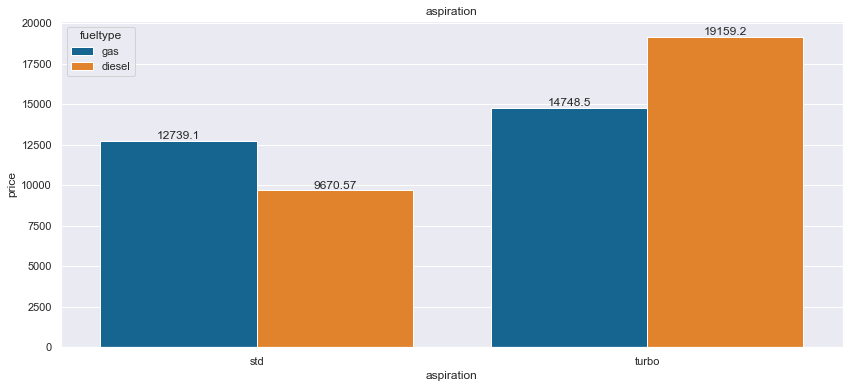

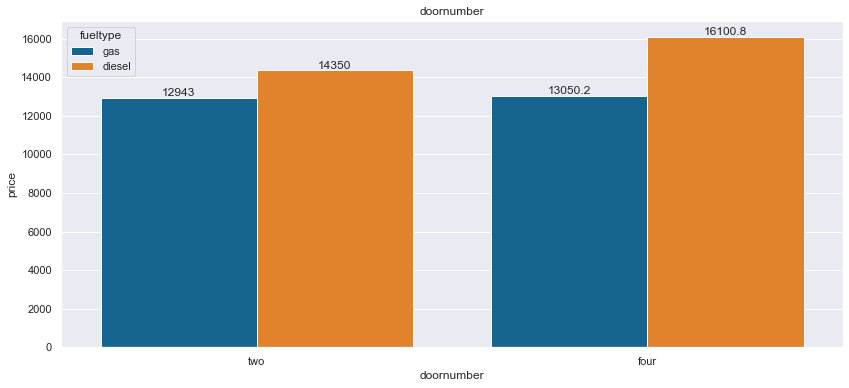

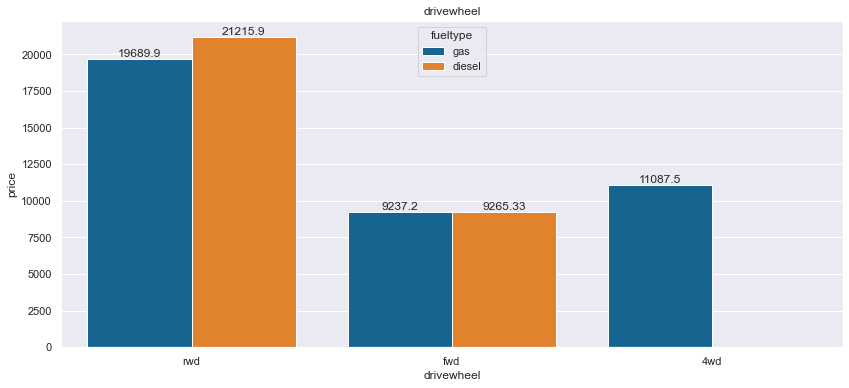

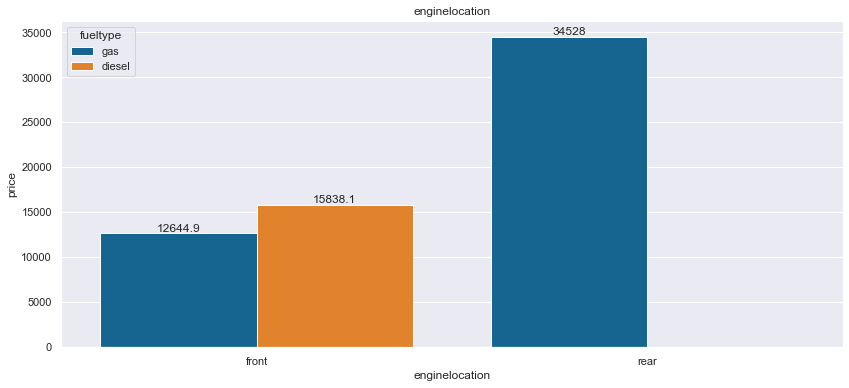

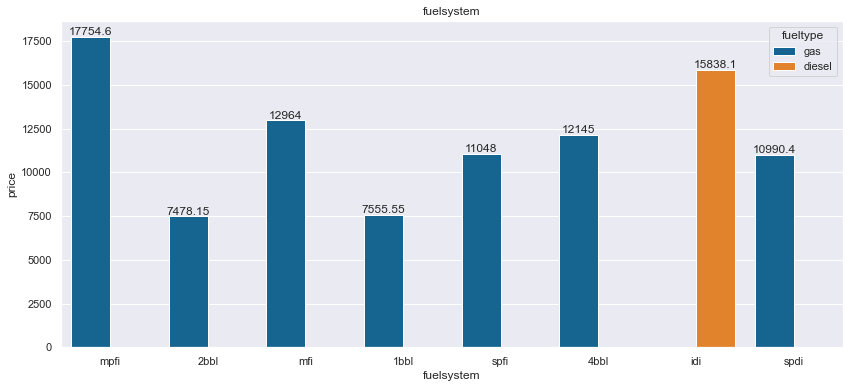

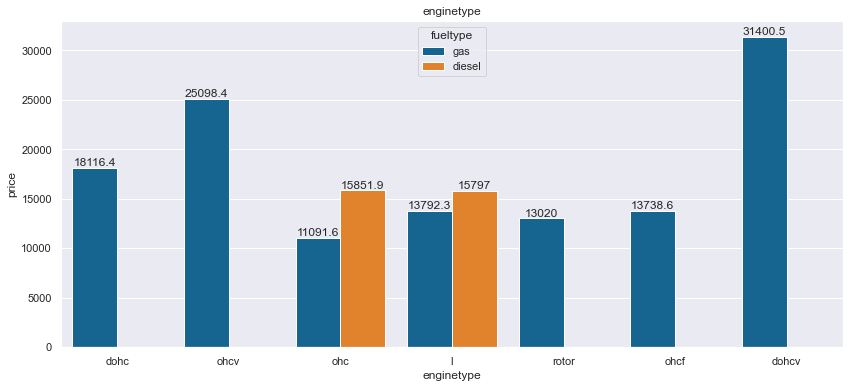

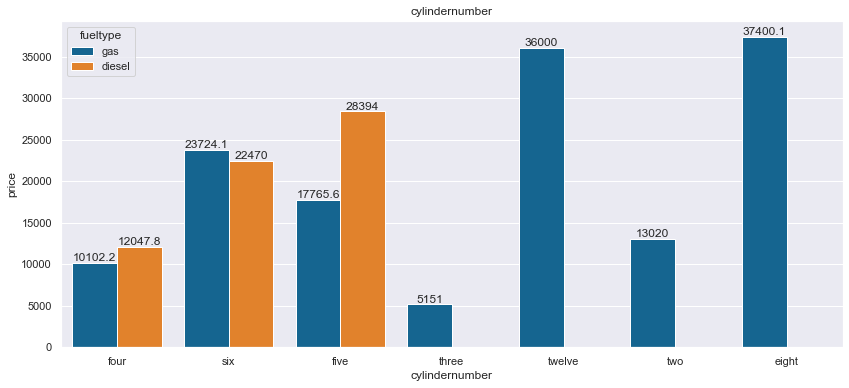

In [19]:
categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']



# Increases the size of sns plots
sns.set(rc={'figure.figsize':(14,6)})
plt.style.use("tableau-colorblind10")
for c in categories:
    
    ax = sns.barplot(x=c, y="price", data=df, ci=False , hue = 'fueltype')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

# 5. Investigating the distributions with distplots

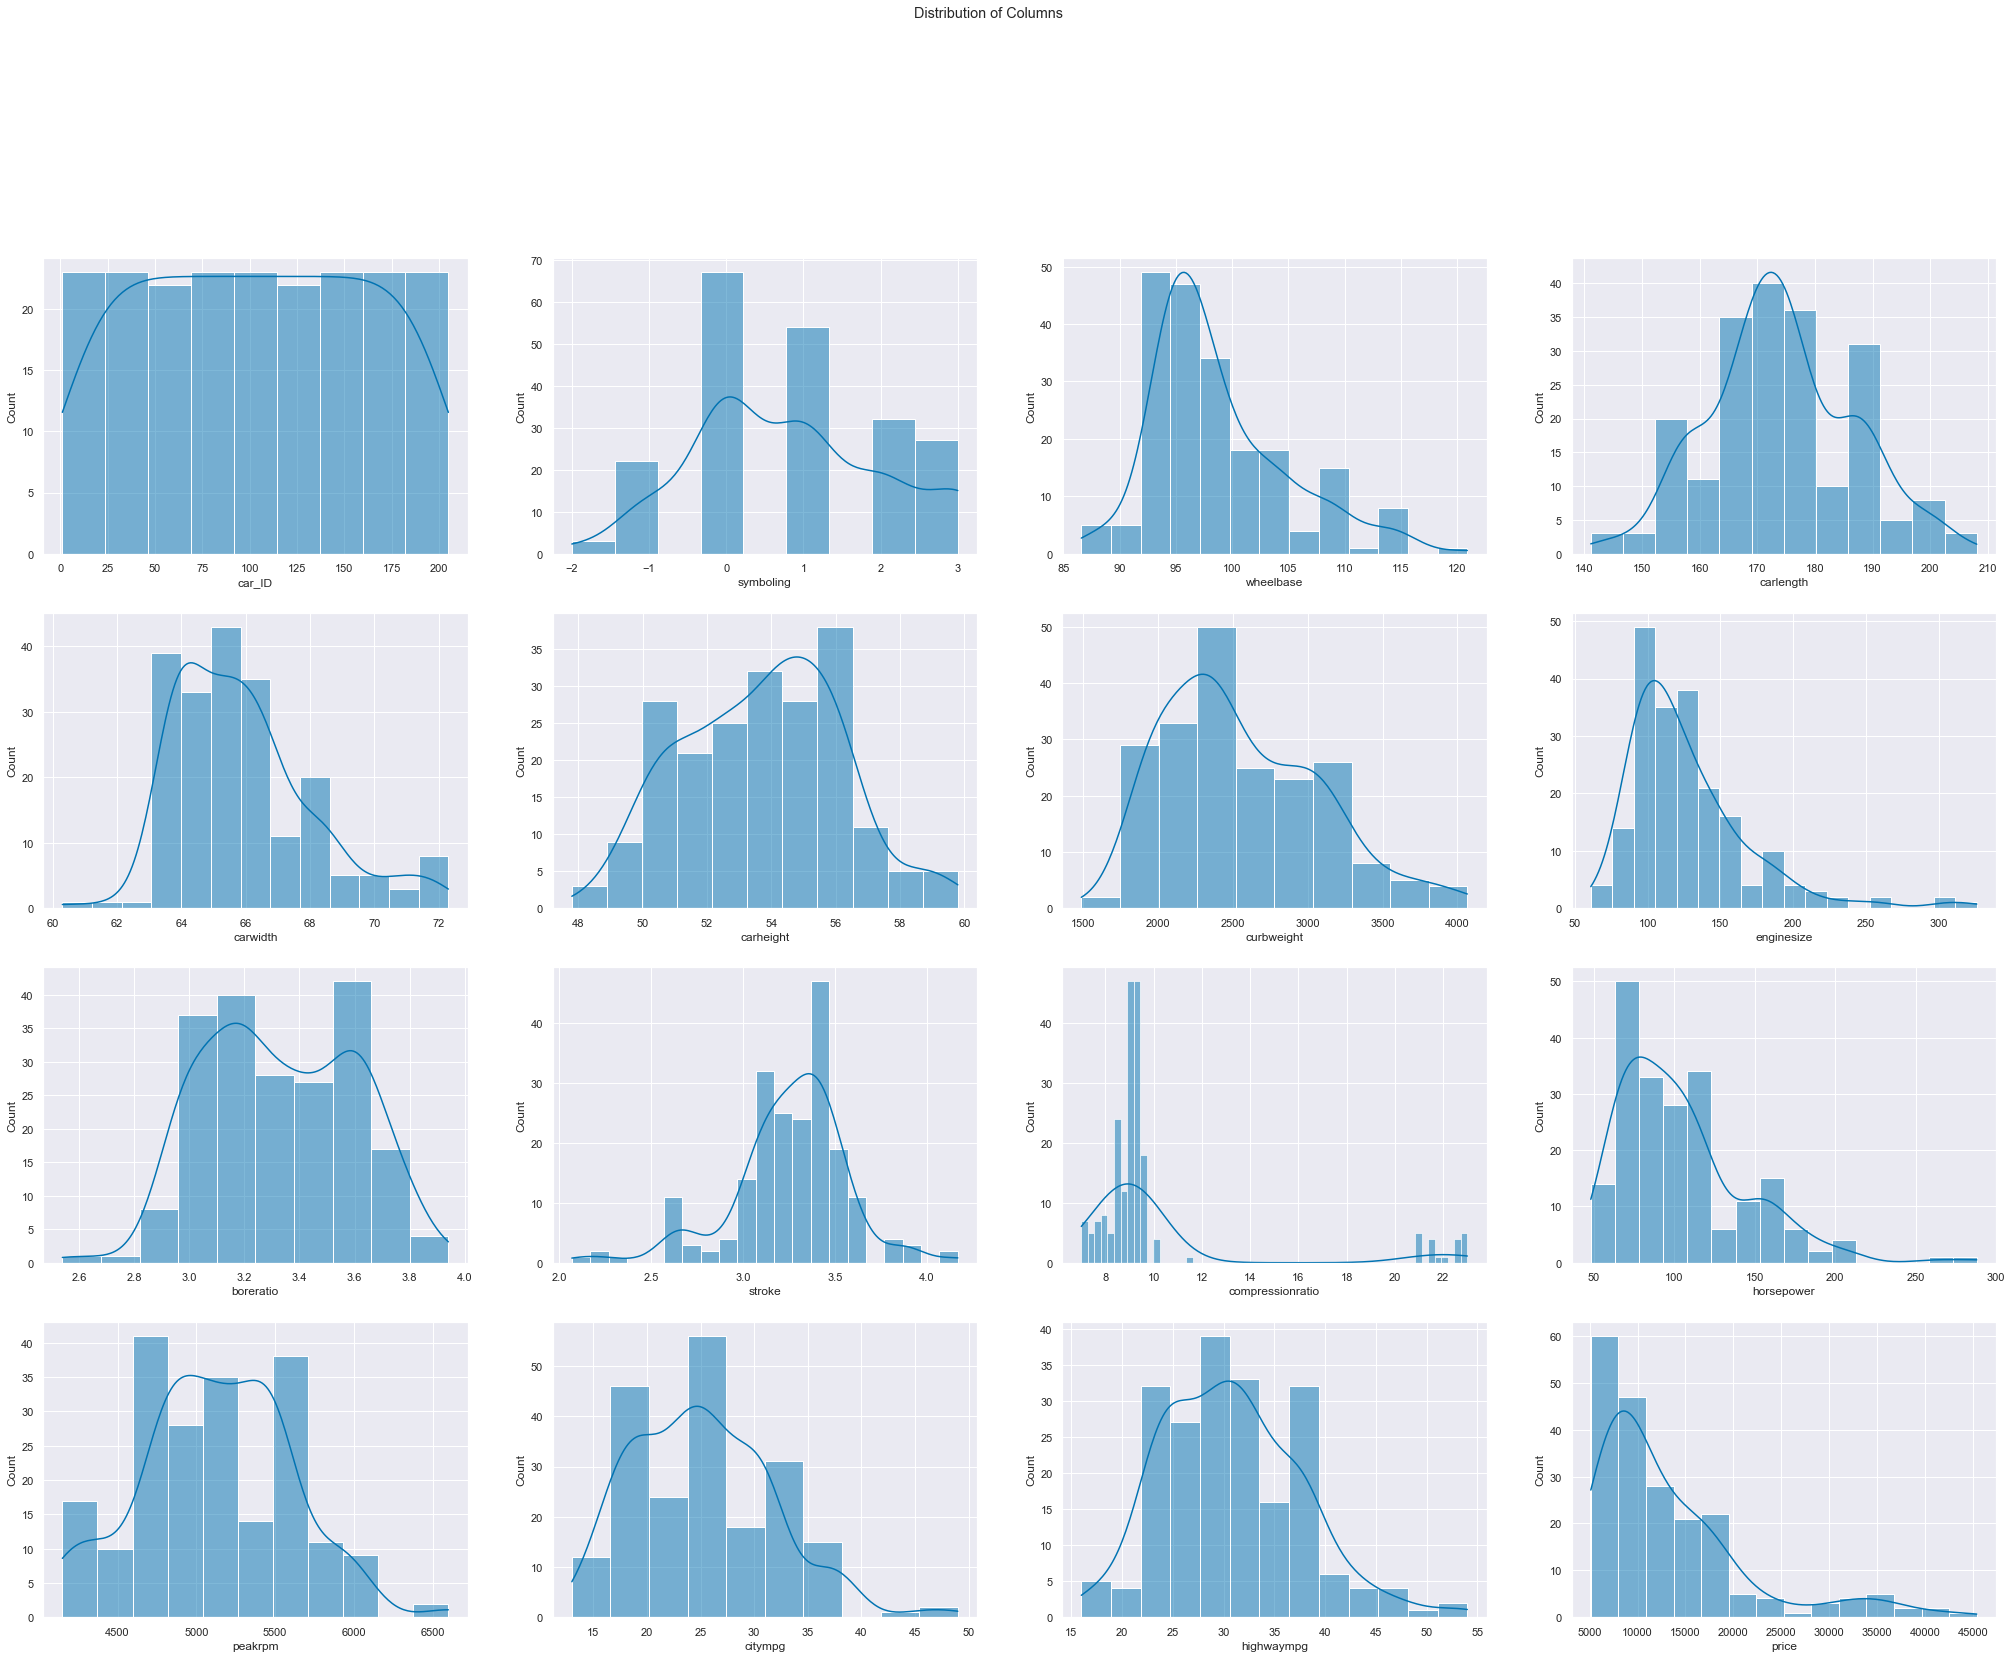

In [20]:
# identifying all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = df.select_dtypes(include=numerics).columns



sns.set_palette('colorblind')
fig, ax = plt.subplots(4,4,figsize=(35,25))
for i, col in enumerate(n_variables):
    sns.histplot(df[col], kde=True, ax=ax[i//4, i%4])
fig.suptitle('Distribution of Columns', y=1.02)
plt.show()

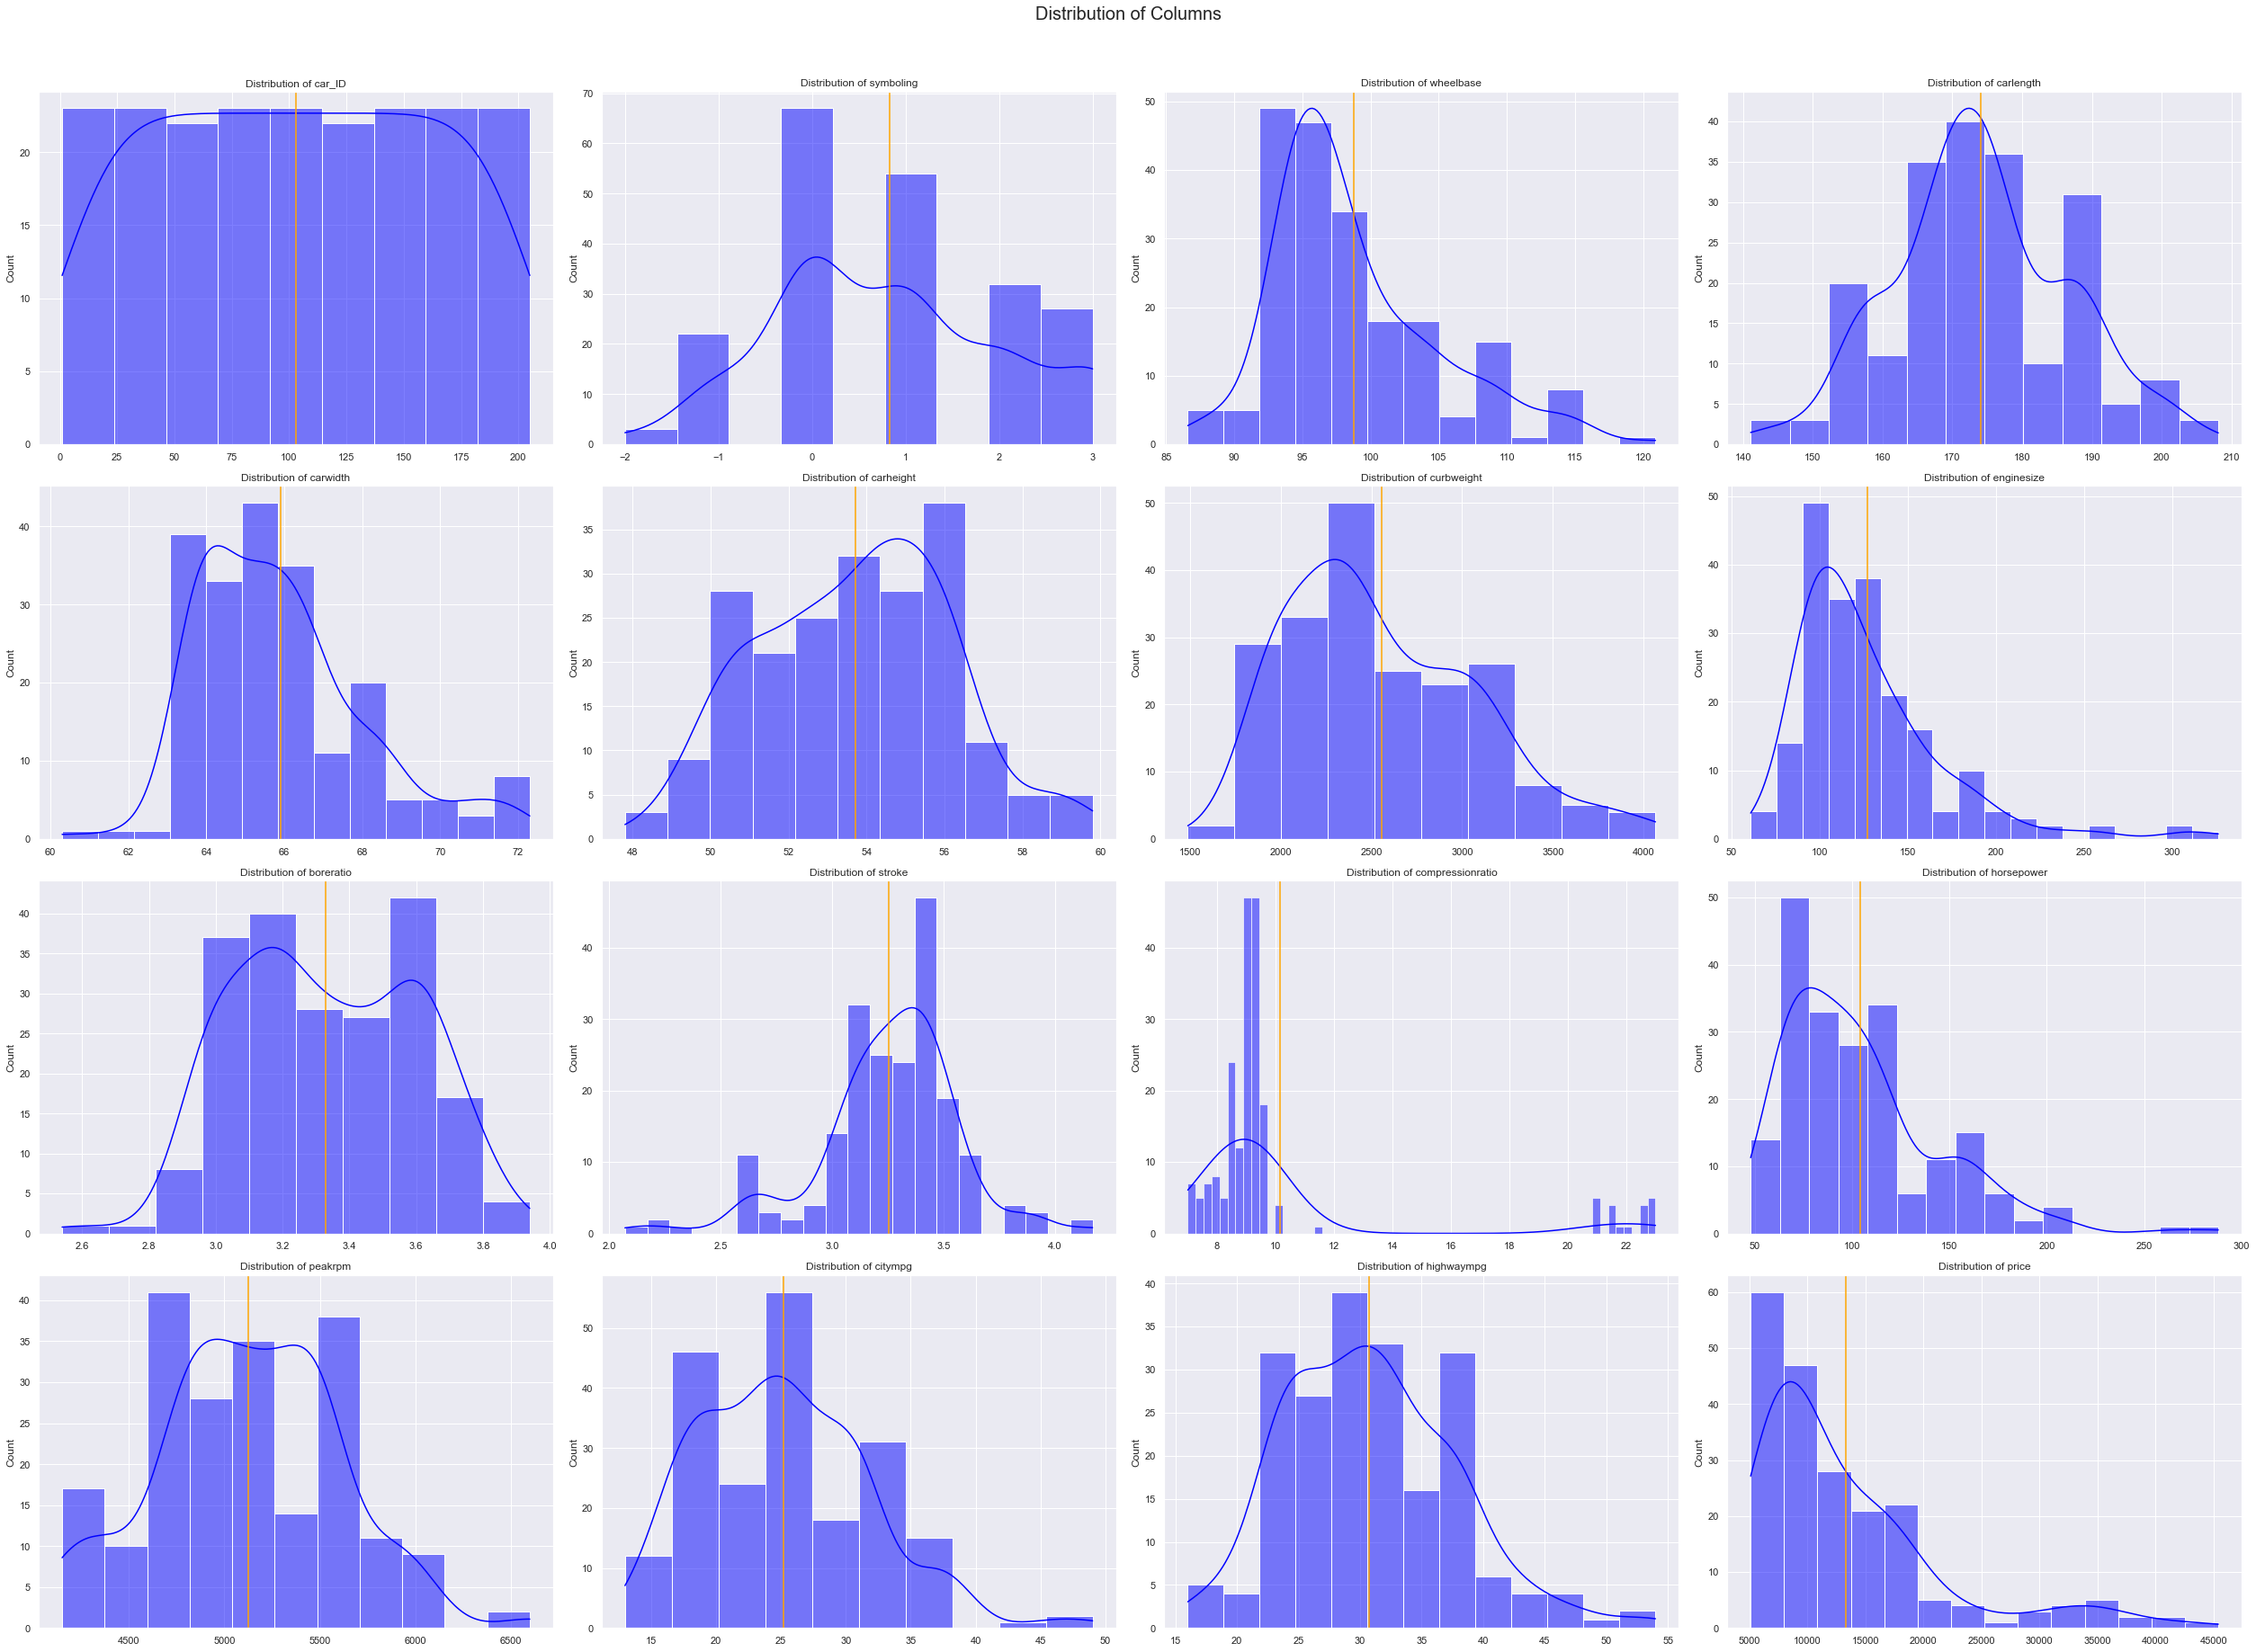

In [21]:
fig, ax = plt.subplots(4, 4, figsize=(35,25))

for i, n in enumerate(n_variables):
    x = df[n].values
    sns.histplot(x, color='blue', ax=ax[i//4, i%4], kde=True)
    mean = df[n].mean()
    ax[i//4, i%4].axvline(mean, color='orange')
    ax[i//4, i%4].set_title(f'Distribution of {n}')

fig.suptitle('Distribution of Columns', y=1.02, fontsize=20)
plt.tight_layout()
plt.show()

# 6. Investigating the distribution and outliers with Box plots

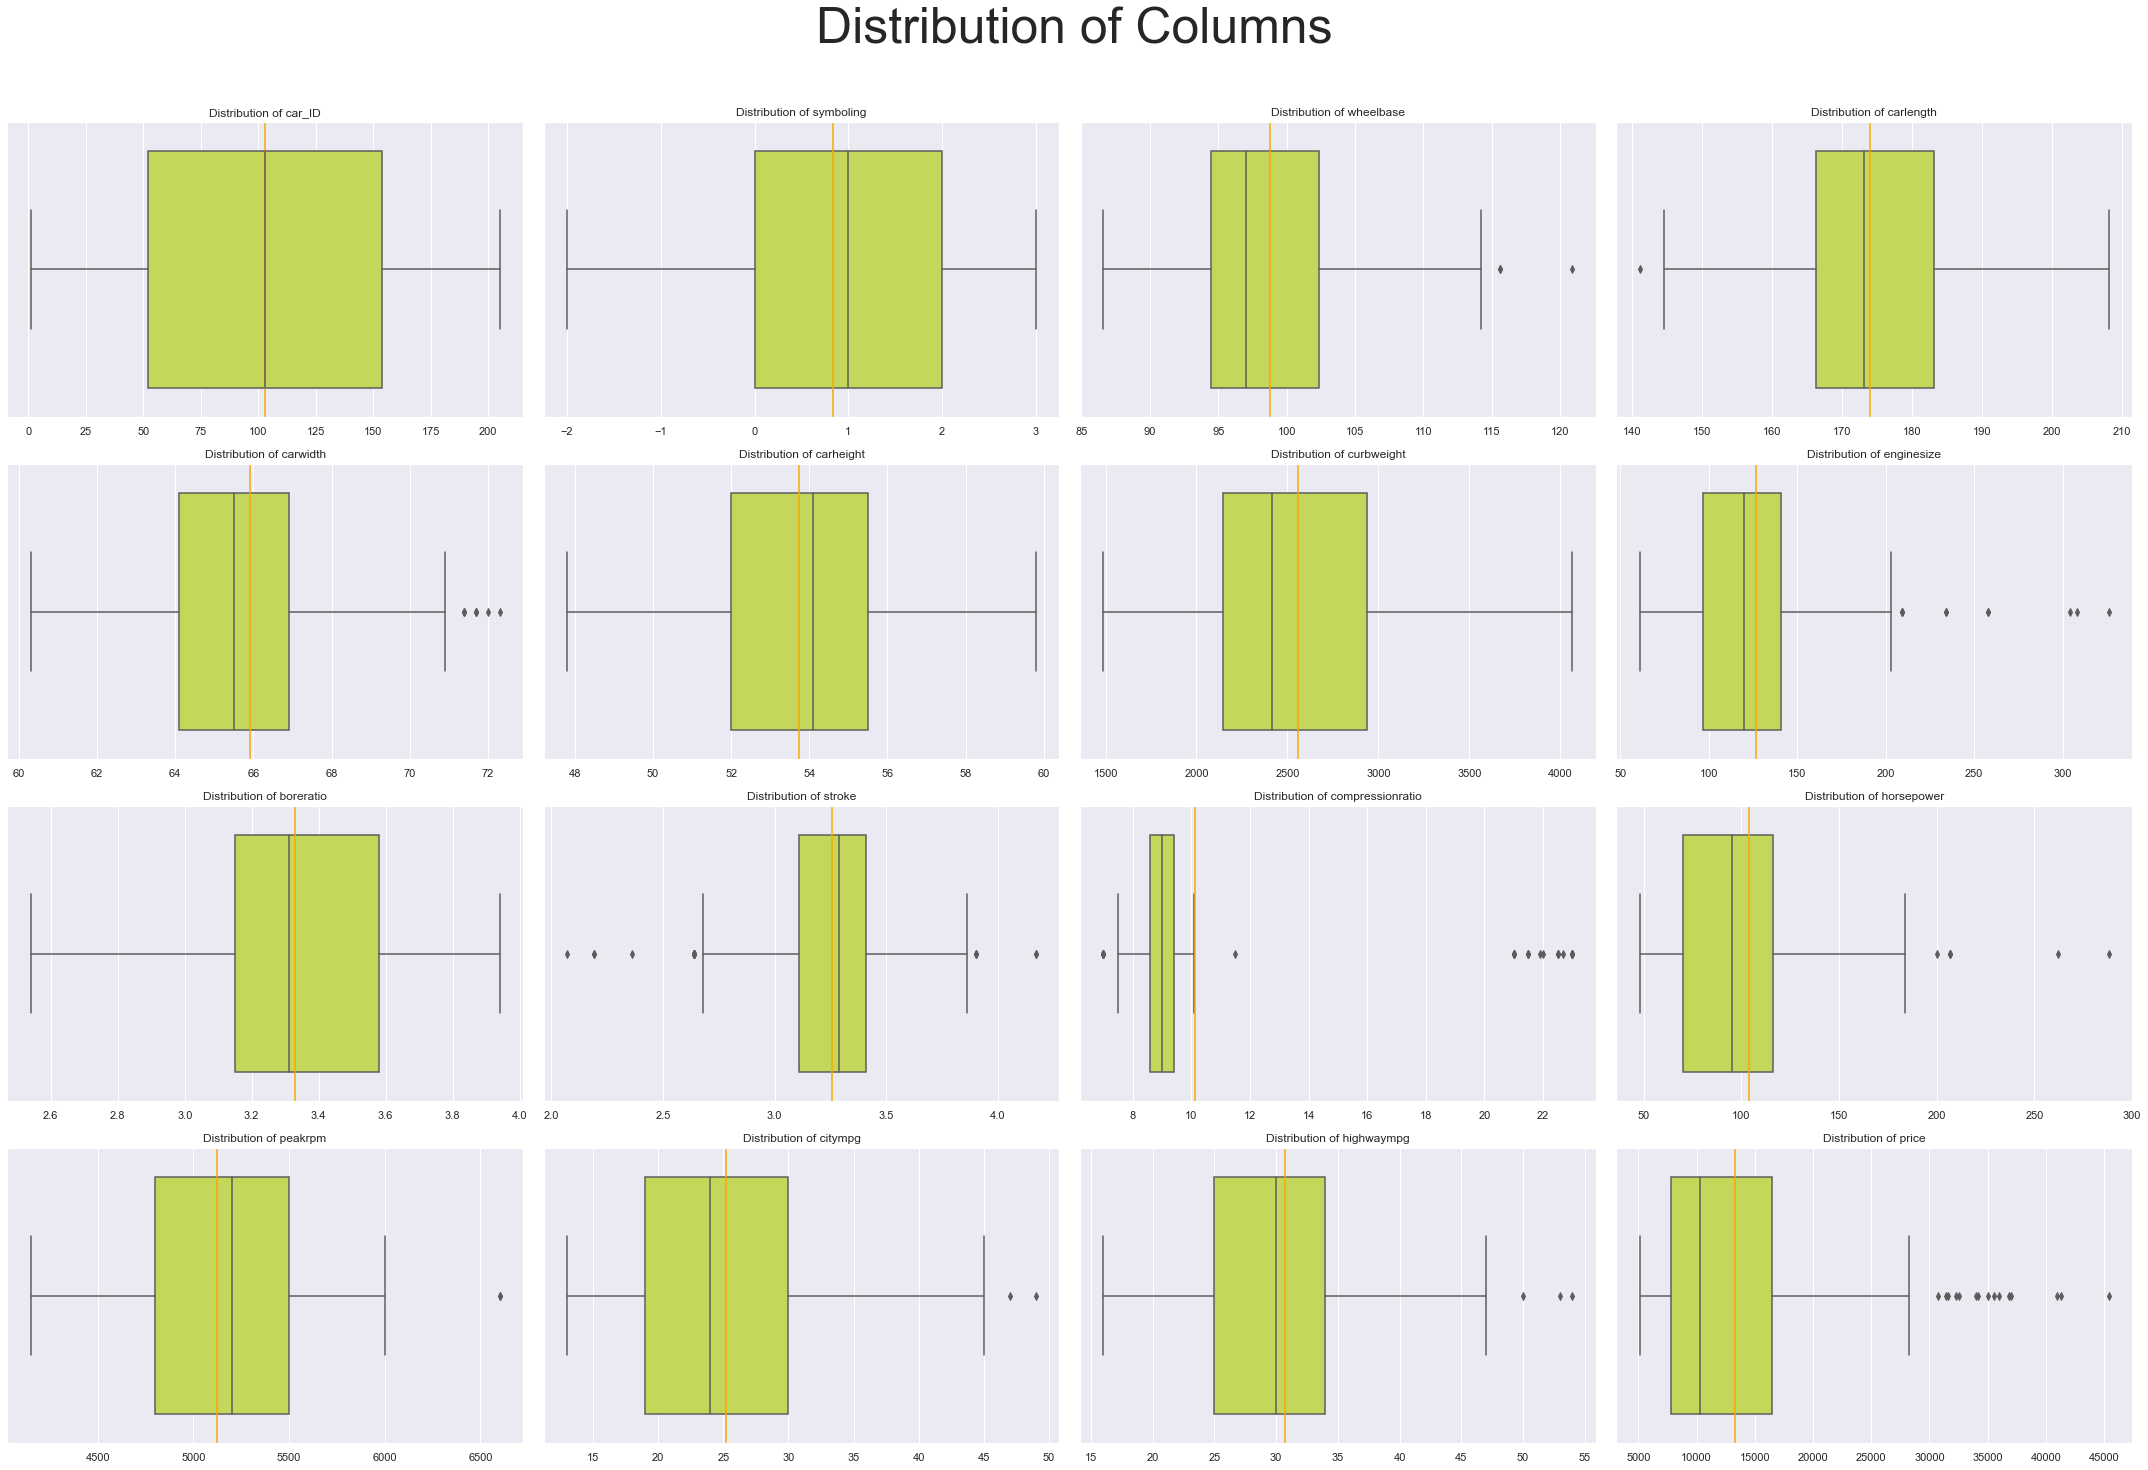

In [22]:
fig, ax = plt.subplots(4, 4, figsize=(30,20))

for i, n in enumerate(n_variables):
    x = df[n].values
    sns.boxplot(x, orient="v", color='#D1EC46', ax=ax[i//4, i%4])
    mean = df[n].mean()
    ax[i//4, i%4].axvline(mean, color='orange')
    ax[i//4, i%4].set_title(f'Distribution of {n}')

fig.suptitle('Distribution of Columns', y=1.02, fontsize=50)
plt.tight_layout()
plt.show()

The Mean is:  103.0
The Meadian is:  103.0


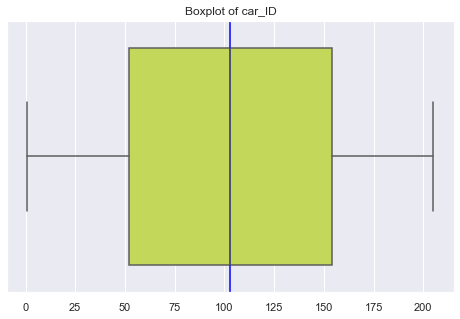

The Mean is:  0.83
The Meadian is:  1.0


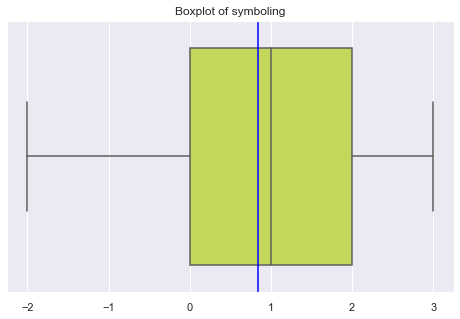

The Mean is:  98.76
The Meadian is:  97.0


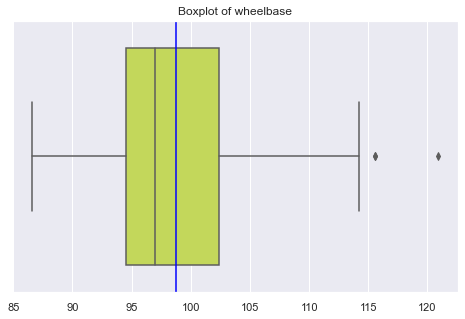

The Mean is:  174.05
The Meadian is:  173.2


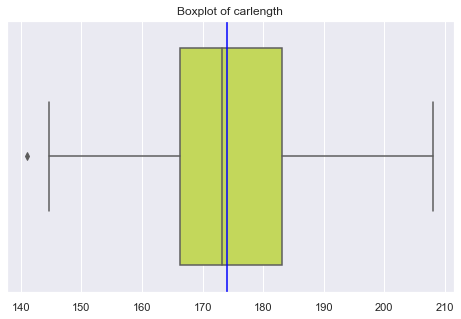

The Mean is:  65.91
The Meadian is:  65.5


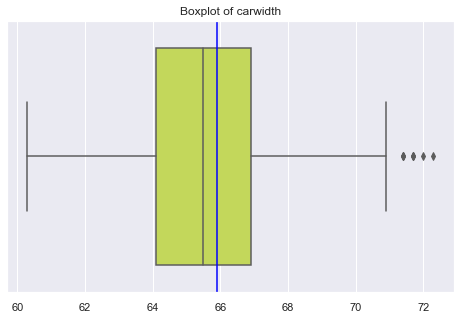

The Mean is:  53.72
The Meadian is:  54.1


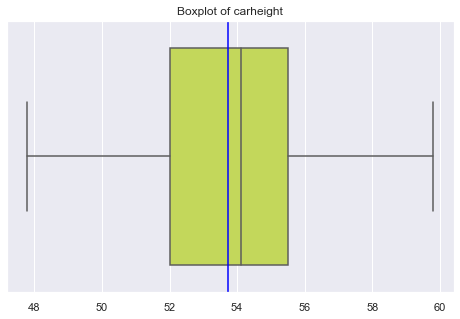

The Mean is:  2555.57
The Meadian is:  2414.0


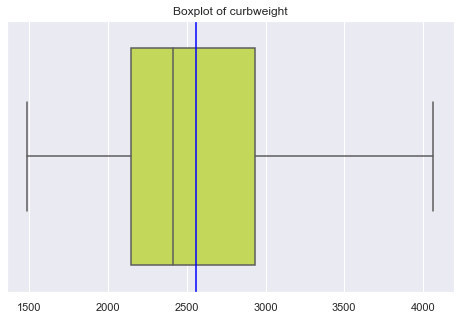

The Mean is:  126.91
The Meadian is:  120.0


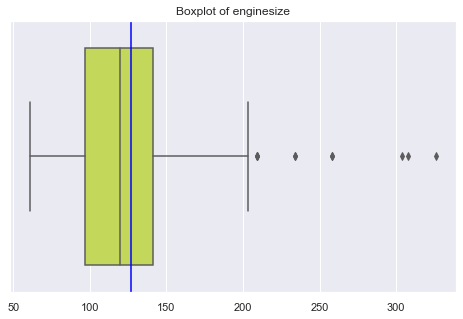

The Mean is:  3.33
The Meadian is:  3.31


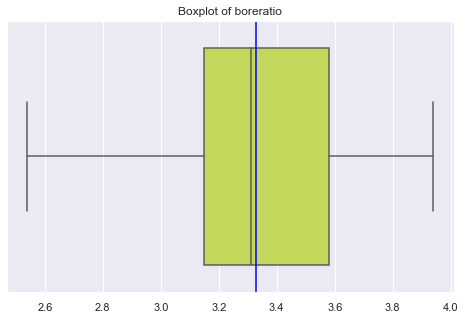

The Mean is:  3.26
The Meadian is:  3.29


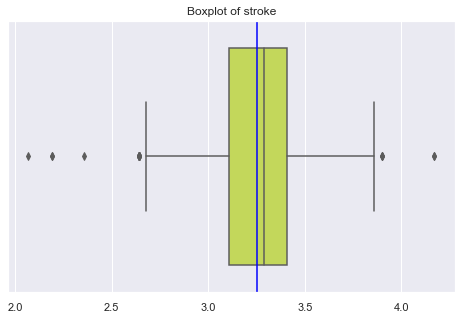

The Mean is:  10.14
The Meadian is:  9.0


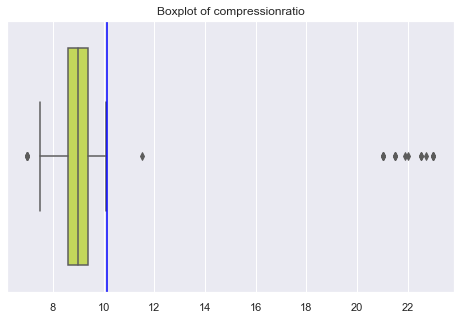

The Mean is:  104.12
The Meadian is:  95.0


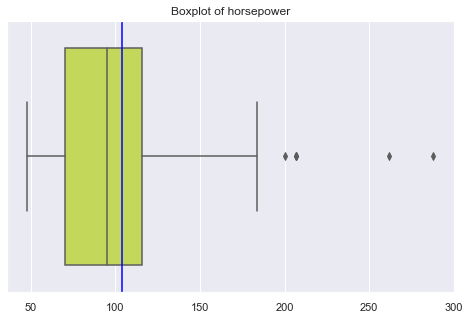

The Mean is:  5125.12
The Meadian is:  5200.0


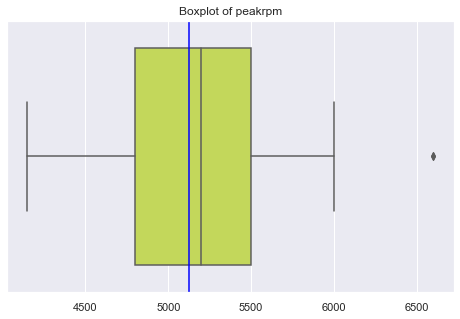

The Mean is:  25.22
The Meadian is:  24.0


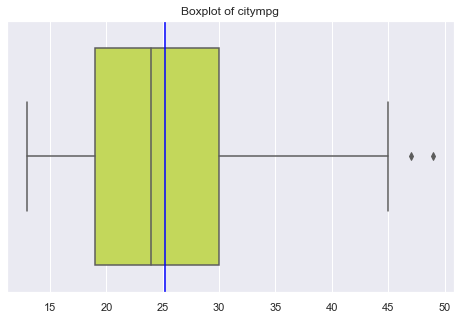

The Mean is:  30.75
The Meadian is:  30.0


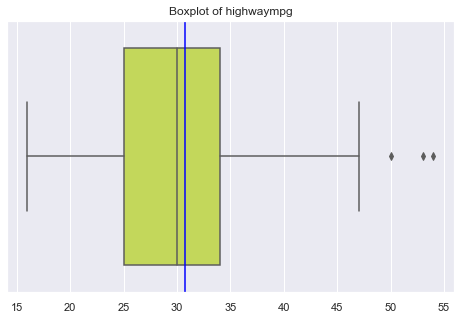

The Mean is:  13276.71
The Meadian is:  10295.0


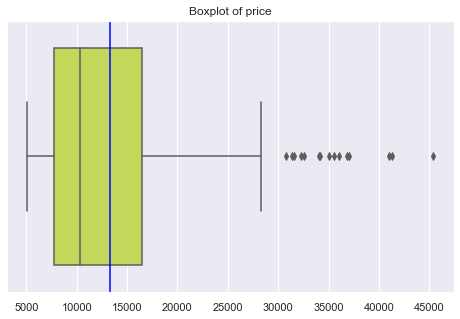

In [23]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = df[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    mean = df[c].mean()
    plt.axvline(mean, color='blue')
    print('The Mean is: ', round(df[c].mean(),2))
    print('The Meadian is: ', df[c].median())
    plt.title(f"Boxplot of {c}")
    plt.show()

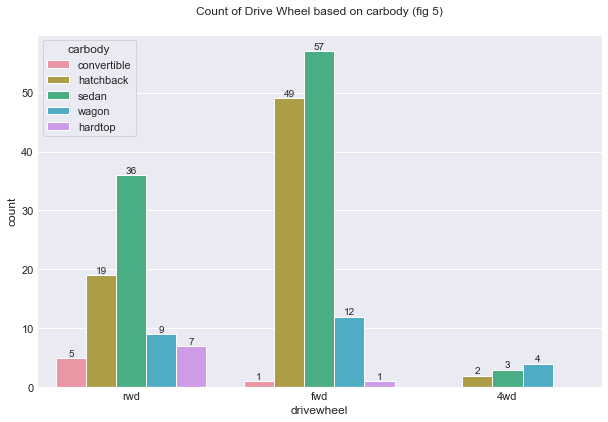

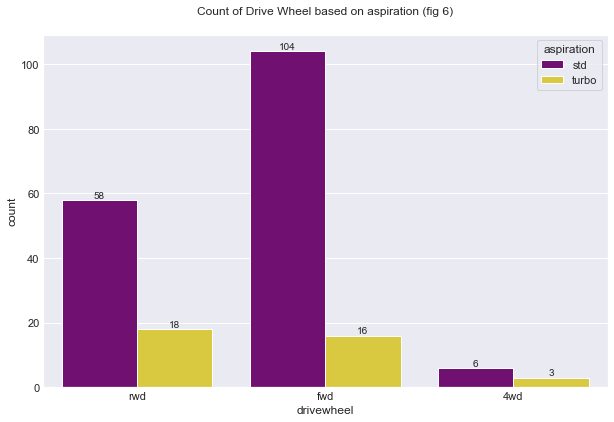

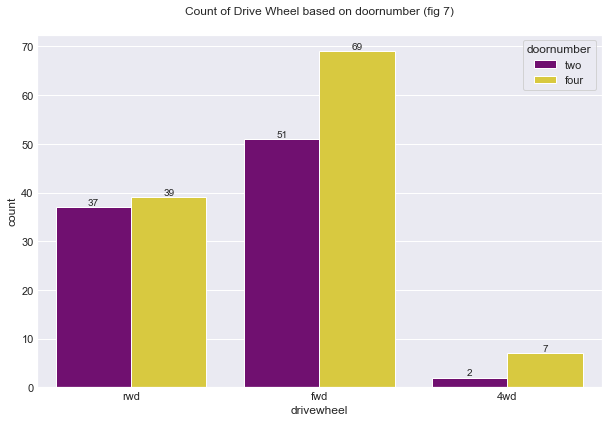

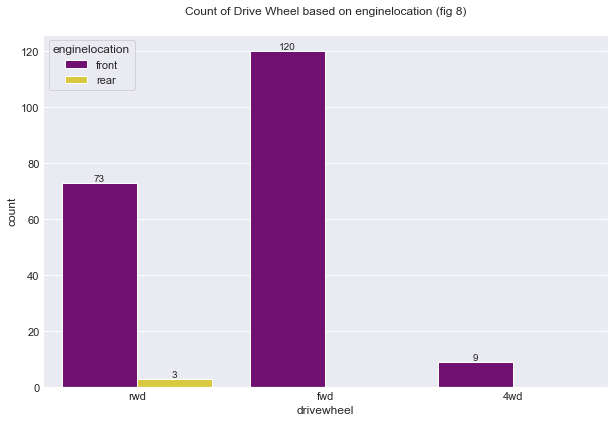

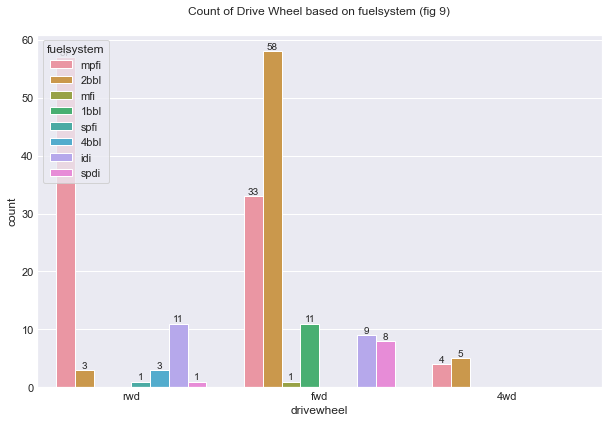

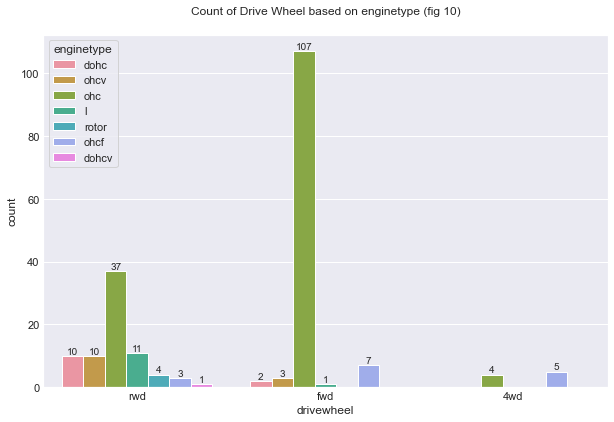

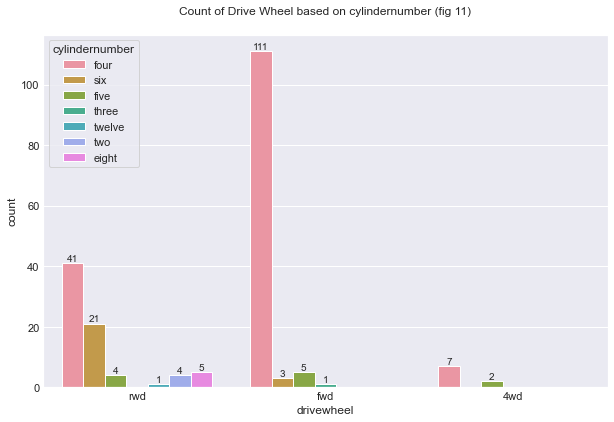

In [24]:
categories = ['carbody', 'aspiration','doornumber','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

%matplotlib inline
plt.style.use("_mpl-gallery")
sns.set_palette(["#800080", "#F1DD27",'#2F3C7E', '#FBEAEB'])
for i, col in enumerate(categories):
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x='drivewheel', hue=col)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Count of Drive Wheel based on {col} (fig {i+5})',pad=20)
    plt.show()

# 7.Converting the categorical values into numerical representation

In [25]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [26]:
# Making categorical variables into numeric representation
# Object -8

new_df = pd.get_dummies(df, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_df.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548           four         130       3.47   
1      64.1       48.8        2548           four         130       3.47   
2      65.5       52.4        2823            six         152       2.68   
3      66.2       54.3        2337           four         109       3.19   
4      66.4       54.3        2824           five         136       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  carbody_convertible  carbody_hardtop  carbody_hatchback  \
0  13495.0                    1                0                  0   
1  16500.0                    1                0                  0   
2  16500.0                    0                0                  1   
3  13950.0                    0                0                  0   
4  17450.0                    0                0                  0   

   carbody_sedan  carbody_wagon  aspiration_std  aspiration_turbo  \
0              0              0               1                 0   
1              0              0               1                 0   
2              0              0               1                 0   
3              1              0               1                 0   
4              1              0               1                 0   

   doornumber_four  doornumber_two  drivewheel_4wd  drivewheel_fwd  \
0                0               1               0               0   
1                0               1               0               0   
2                0               1               0               0   
3                1               0               0               1   
4                1               0               1               0   

   drivewheel_rwd  enginelocation_front  enginelocation_rear  fuelsystem_1bbl  \
0               1                     1                    0                0   
1               1                     1                    0                0   
2               1                     1                    0                0   
3               0                     1                    0                0   
4               0                     1                    0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  enginetype_dohc  \
0                1                0                0                1   
1                1                0                0                1   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  enginet

In [27]:
new_df['cylindernumber'].loc[new_df['cylindernumber'] == 'two'] = 2
new_df['cylindernumber'].loc[new_df['cylindernumber'] == 'three'] = 3
new_df['cylindernumber'].loc[new_df['cylindernumber'] == 'four'] = 4
new_df['cylindernumber'].loc[new_df['cylindernumber'] == 'five'] = 5
new_df['cylindernumber'].loc[new_df['cylindernumber'] == 'six'] = 6
new_df['cylindernumber'].loc[new_df['cylindernumber'] == 'eight'] = 8
new_df['cylindernumber'].loc[new_df['cylindernumber'] == 'twelve'] = 12
new_df['cylindernumber'] = new_df['cylindernumber'].astype(int)

# 8.Selecting the important features

## Heatmap
 1. First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
 2. .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
 3. The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease

In [28]:
del new_df['CarName']

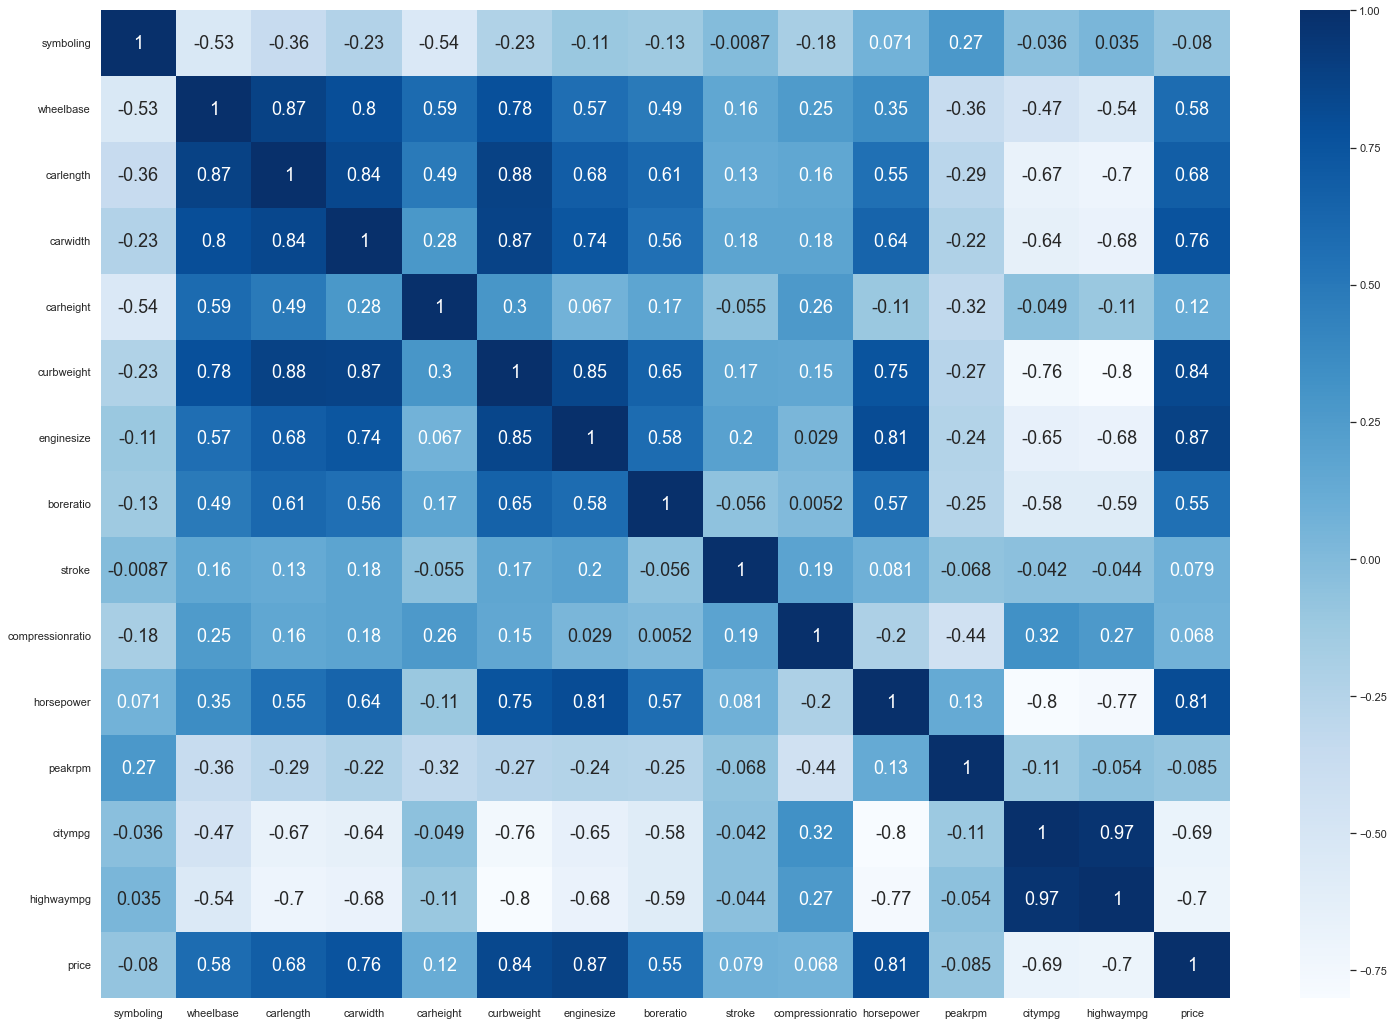

In [29]:
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(20,14)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_df[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':18},
                 cmap="Blues")

# Feature Importance
Steps of Running Feature Importance

 1. Split the data into X & y
 2. Run a Tree-based estimators (i.e. decision trees & random forests)
 3. Run Feature Importance
 4. We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature

In [30]:
new_df

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     cylindernumber  enginesize  boreratio  stroke  compressionratio  \
0                 4         130       3.47    2.68               9.0   
1                 4         130       3.47    2.68               9.0   
2                 6         152       2.68    3.47               9.0   
3                 4         109       3.19    3.40              10.0   
4                 5         136       3.19    3.40               8.0   
..              ...         ...        ...     ...               ...   
200               4         141       3.78    3.15               9.5   
201               4         141       3.78    3.15               8.7   
202               6         173       3.58    2.87               8.8   
203               6         145       3.01    3.40              23.0   
204               4         141       3.78    3.15               9.5   

     horsepower  peakrpm  citympg  highwaympg    price  carbody_convertible  \
0           111     5000       21          27  13495.0                    1   
1           111     5000       21          27  16500.0                    1   
2           154     5000       19          26  16500.0                    0   
3           102     5500       24          30  13950.0                    0   
4           115     5500       18          22  17450.0                    0   
..          ...      ...      ...         ...      ...                  ...   
200         114     5400       23          28  16845.0                    0   
201         160     5300       19          25  19045.0                    0   
202         134     5500       18          23  21485.0                    0   
203         106     4800       26          27  22470.0                    0   
204         114     5400       19          25  22625.0                    0   

     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                  0                  0              0              0   
1                  0                  0              0              0   
2                  0                  1              0              0   
3                  0                  0              1              0   
4                  0                  0              1              0   
..               ...                ...            ...            ...   
200                0                  0              1              0   
201                0                  0              1              0   
202                0                  0              1              0   
203                0                  0              1              0   
204                0                  0              1              0   

     aspiration_std  aspiration_turbo  doornumber_four  doornumber_two  \
0                 1                 0                0               1   
1                 1                 0                0               1   
2                 1                 0                0               1   
3                 1                 0        

In [31]:
#X_columns = new_df.drop(['price'], axis = 1)

X = new_df.drop(['car_ID','price'], axis = 1)
y = new_df['price'].astype(int)

print(X.shape)
print(y.shape)

(205, 46)
(205,)


In [32]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

In [33]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

decision_tree = DecisionTreeClassifier(random_state=123, criterion  = 'entropy', max_depth = 7)
decision_tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=123)

In [34]:
decision_tree.feature_importances_

array([0.000000, 0.122956, 0.067811, 0.034865, 0.133780, 0.250789,
       0.009929, 0.042734, 0.071838, 0.031280, 0.031198, 0.031786,
       0.032732, 0.042740, 0.035699, 0.000000, 0.001954, 0.021714,
       0.001954, 0.009146, 0.001954, 0.000000, 0.000000, 0.004791,
       0.000000, 0.003443, 0.000000, 0.000000, 0.000000, 0.001954,
       0.001954, 0.000000, 0.001954, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000535, 0.000000, 0.000000, 0.008510, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000])

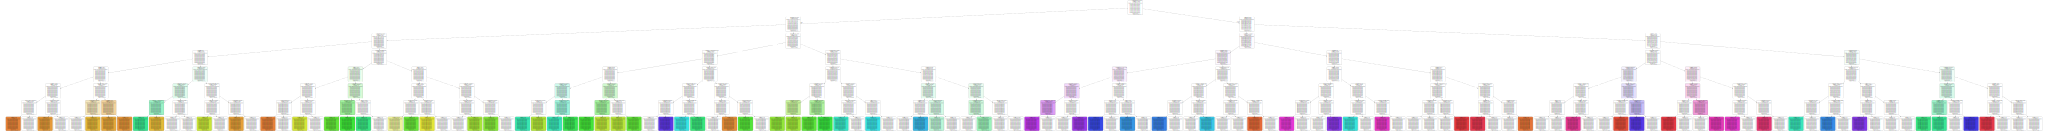

In [35]:
import graphviz 
from sklearn import tree

decision_data = tree.export_graphviz(decision_tree, out_file=None, 
    feature_names= X.columns,    
    class_names= y.unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(decision_data)
graph

In [36]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_df.drop(['car_ID','price'], axis = 1)):
    print('Importance of feature {}:, {:.3f}'.format(column, decision_tree.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [decision_tree.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature symboling:, 0.000
Importance of feature wheelbase:, 0.123
Importance of feature carlength:, 0.068
Importance of feature carwidth:, 0.035
Importance of feature carheight:, 0.134
Importance of feature curbweight:, 0.251
Importance of feature cylindernumber:, 0.010
Importance of feature enginesize:, 0.043
Importance of feature boreratio:, 0.072
Importance of feature stroke:, 0.031
Importance of feature compressionratio:, 0.031
Importance of feature horsepower:, 0.032
Importance of feature peakrpm:, 0.033
Importance of feature citympg:, 0.043
Importance of feature highwaympg:, 0.036
Importance of feature carbody_convertible:, 0.000
Importance of feature carbody_hardtop:, 0.002
Importance of feature carbody_hatchback:, 0.022
Importance of feature carbody_sedan:, 0.002
Importance of feature carbody_wagon:, 0.009
Importance of feature aspiration_std:, 0.002
Importance of feature aspiration_turbo:, 0.000
Importance of feature doornumber_four:, 0.000
Importance of feature 

index              Variable  Feature Importance Score
0       5            curbweight                  0.250789
1       4             carheight                  0.133780
2       1             wheelbase                  0.122956
3       8             boreratio                  0.071838
4       2             carlength                  0.067811
5      13               citympg                  0.042740
6       7            enginesize                  0.042734
7      14            highwaympg                  0.035699
8       3              carwidth                  0.034865
9      12               peakrpm                  0.032732
10     11            horsepower                  0.031786
11      9                stroke                  0.031280
12     10      compressionratio                  0.031198
13     17     carbody_hatchback                  0.021714
14      6        cylindernumber                  0.009929
15     19         carbody_wagon                  0.009146
16     40        enginetype_ohc                  0.008510
17     23        doornumber_two                  0.004791
18     25        drivewheel_fwd                  0.003443
19     18         carbody_sedan                  0.001954
20     20        aspiration_std                  0.001954
21     16       carbody_hardtop                  0.001954
22     29       fuelsystem_1bbl                  0.001954
23     30       fuelsystem_2bbl                  0.001954
24     32        fuelsystem_idi                  0.001954
25     37       enginetype_dohc                  0.000535
26     35       fuelsystem_spdi                  0.000000
27     43      enginetype_rotor                  0.000000
28     42       enginetype_ohcv                  0.000000
29     41       enginetype_ohcf                  0.000000
30     44       fueltype_diesel                  0.000000
31     39          enginetype_l                  0.000000
32     38      enginetype_dohcv                  0.000000
33     36       fuelsystem_spfi                  0.000000
34      0             symboling                  0.000000
35     34       fuelsystem_mpfi                  0.000000
36     33        fuelsystem_mfi                  0.000000
37     31       fuelsystem_4bbl                  0.000000
38     28   enginelocation_rear                  0.000000
39     27  enginelocation_front                  0.000000
40     26        drivewheel_rwd                  0.000000
41     24        drivewheel_4wd                  0.000000
42     22       doornumber_four                  0.000000
43     21      aspiration_turbo                  0.000000
44     15   carbody_convertible                  0.000000
45     45          fueltype_gas                  0.000000

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(164, 46)
(41, 46)
(164,)
(41,)


# 7. What is Linear Regression Analysis
 1. Linear regression is a widely used machine learning model that predicts continues numbers as outputs; not classes
 2. It models the relationship of 2 plus variables by fitting a linear equation to observed data
 3. In linear regression you have 1 dependent variable (y) and 1 plus independent variables (X)
 4. Before you attempt to model the data, you should check if there is a relationship between the variables first; a good way is to use a scatterplot to visualise the data

# What is Linear Regression Analysis (continued)
 1. A measurement of the relationship between 2 variables is the correlation coefficient; ranging from -1 to 1; the closer to 1 or -1, the stronger the relationship

 2. However, even if there seems to be a relationship, you should always be careful when modelling the relationship between 2 variables as correlation is not causation. For example, the rise of temperature vs Revenue.. (ice cream example)
  
 3. The mathematical equation of linear regression is **Y = a + bX**; where X is the independent variable and Y is the dependent variable. ‘b’ is the slope of the line and 'a' is the intercept; the value of y when x = 0
  
 4. The most common cost function used in linear regression is the “Least Squared Errors” function; which is the **sum of squared errors (sum(y actuals – y predicted) ^ 2)** over the training set; trying to minimize how far off the predictions are from the actuals.
  
 5. To calculate the “Least Squared Errors” firstly you must calculate the difference of the actual (y) vs the p(y); this is called the residuals.
 
 6. In order to find the least squared error you will have to find the optimal parameter values (b) that minimize the sum ‘S’ of squared residuals

# 8. Running Linear Regression

In [38]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

In [39]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)

The Accuracy  on the training dataset is:  0.9228000921502036
The Accuracy r2  on the training dataset prediction is:  0.9228000921502036

The Accuracy  on the testing dataset is:  0.8960277131301201

The RMSE  on the training dataset is:  2280.2070839425146
The RMSE  on the testing dataset is:  2034.8009970097942

The MAE  on the training dataset is:  1674.9995850101923
The MAE  on the testing dataset is:  1641.2066418705147

Coefficients:  [194.975730 5.168602 -44.052499 652.557299 398.925935 4.495490 426.685406
 162.480925 -3678.965749 -4173.156854 -1524.403872 -16.169807 3.016039
 -107.844424 369.524897 2873.914270 -297.042413 -548.741210 102.975284
 -2131.105931 -1441.215727 1441.215727 166.405990 -166.405990 -1163.489272
 -523.173798 1686.663070 -4145.581727 4145.581727 -148.916695 331.326184
 -1253.072587 6402.728112 -2974.448834 532.080824 -3171.426495 281.729492
 -2129.272400 945.571953 -3884.935043 -154.020971 119.136785 -6480.330131
 11583.849808 6402.728112 -6402.728112]

I

In [41]:
# Get intercept and coefficients
intercept = lm.intercept_
coefs = lm.coef_
columns = X_train.columns

# Start with the intercept
equation = f"{intercept:.3f}"

# Add each coefficient and column name
for coef, col in zip(coefs, columns):
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.3f}{col}"

print("Regression Equation:")
print("")
print(equation)

Regression Equation:

-49358.750 + 194.976symboling + 5.169wheelbase - 44.052carlength + 652.557carwidth + 398.926carheight + 4.495curbweight + 426.685cylindernumber + 162.481enginesize - 3678.966boreratio - 4173.157stroke - 1524.404compressionratio - 16.170horsepower + 3.016peakrpm - 107.844citympg + 369.525highwaympg + 2873.914carbody_convertible - 297.042carbody_hardtop - 548.741carbody_hatchback + 102.975carbody_sedan - 2131.106carbody_wagon - 1441.216aspiration_std + 1441.216aspiration_turbo + 166.406doornumber_four - 166.406doornumber_two - 1163.489drivewheel_4wd - 523.174drivewheel_fwd + 1686.663drivewheel_rwd - 4145.582enginelocation_front + 4145.582enginelocation_rear - 148.917fuelsystem_1bbl + 331.326fuelsystem_2bbl - 1253.073fuelsystem_4bbl + 6402.728fuelsystem_idi - 2974.449fuelsystem_mfi + 532.081fuelsystem_mpfi - 3171.426fuelsystem_spdi + 281.729fuelsystem_spfi - 2129.272enginetype_dohc + 945.572enginetype_dohcv - 3884.935enginetype_l - 154.021enginetype_ohc + 119.137engi

# Notes:
 1. The accuracy score represents the coefficient of determination ( **𝑅2** ). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations
 2. The **R Square** is measure of how close the data are to the fitted regression line.
 3. In this case we can say that our model explains **93%** of the **training data** & **85%** of the **testing data**
 4. The **RMSE** is the standard deviation of the residuals. Residuals is the difference between the predicted value and the  regression line. Hence RMSE is a measure of how spread your residuals are. 
 5. The **mean absolute error (MAE)** is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).
 6. **Coeff** are the weights
 7. The **intercept** is the expected mean value of Y when all X=0

In [42]:
final_fi['Variable'][0:10].values

array(['curbweight', 'carheight', 'wheelbase', 'boreratio', 'carlength',
       'citympg', 'enginesize', 'highwaympg', 'carwidth', 'peakrpm'],
      dtype=object)

In [43]:
test1 = final_fi['Variable'][0:10].values

X2 = new_df[test1].values
y2 = new_df['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=123)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy  on the testing dataset is:  0.8729306106521832
The RMSE  on the testing dataset is:  2249.487659429269
The MAE  on the testing dataset is:  1629.7783499149757


# 9. Trying the recursive feature elimination process

In [44]:
# with Linear Regression

from sklearn.feature_selection import RFE

selector = RFE(lm, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_

print('Chosen best 10 feature by rfe:',X.columns[selector.support_])

rfe_lr = X.columns[selector.support_]

Chosen best 10 feature by rfe: Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')


In [45]:
test2 = rfe_lr

X2 = new_df[test2].values
y2 = new_df['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy  on the testing dataset is:  0.8226144299201712
The RMSE  on the testing dataset is:  3516.652896546838
The MAE  on the testing dataset is:  2410.4047460752327


In [46]:
# With Support vector regressor

from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_
print('Chosen best 10 feature by rfe:',X.columns[selector.support_])

rfe_svr = X.columns[selector.support_]

Chosen best 10 feature by rfe: Index(['wheelbase', 'carlength', 'carwidth', 'enginesize', 'compressionratio',
       'horsepower', 'citympg', 'carbody_hatchback', 'drivewheel_fwd',
       'drivewheel_rwd'],
      dtype='object')


In [47]:
test3 = rfe_svr

X2 = new_df[test3].values
y2 = new_df['price'].astype(int)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy  on the testing dataset is:  0.8933071005120905
The RMSE  on the testing dataset is:  2727.33269737213
The MAE  on the testing dataset is:  2087.2368169593433


# 10. Trying Powerful models

## 10.1. Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=123)

regr = RandomForestRegressor(max_depth=2, random_state=123)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.8957349524022742
The RMSE  on the testing dataset is:  2037.6637361328974
The MAE  on the testing dataset is:  1647.239472713959


In [49]:
# Optimizing Random Forest R

from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8,9],
    'n_estimators': [100, 150, 200, 500,700]
}

grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 180 candidates, totalling 540 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [50]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=10, max_features=5, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200, random_state=123)

In [51]:
regr = best_grid
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.9033984490412448
The RMSE  on the testing dataset is:  1961.350421608787
The MAE  on the testing dataset is:  1297.9951596733335


# 10.2. XG Boost Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=123)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))

The Accuracy  on the testing dataset is:  0.9563855954120541
The RMSE  on the testing dataset is:  1317.8868286953868
The MAE  on the testing dataset is:  996.5245805582831


In [53]:
# optimizing XGBoost Regressor

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor()

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000}


In [54]:
xgbest = clf.best_params_
xgbest

{'colsample_bytree': 0.3,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 1000}

In [56]:
from xgboost import XGBRegressor

# Training the model on best parameters

xgbr1 = XGBRegressor(colsample_bytree = 0.3, learning_rate= 0.01, max_depth=6, n_estimators=1000)
xgbr1.fit(X_train, y_train)
xgbr1

y_pred = xgbr1.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', xgbr1.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,xgbr1.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,xgbr1.predict(X_test)))

The Accuracy  on the testing dataset is:  0.9401847337553648
The RMSE  on the testing dataset is:  1543.3668352601512
The MAE  on the testing dataset is:  1063.771913109756


# Conclusion
## XGBoost Regressor achieved the highest performance without any optimization.

## Highest Performance Model

In [57]:
from sklearn.ensemble import GradientBoostingRegressor




print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



reg = GradientBoostingRegressor(random_state=123)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)


print("")
print("Model Accuracy on testing dataset")
print("_"*100)


print('The Accuracy  on the testing dataset is: ', reg.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,reg.predict(X_test)))


(164, 46)
(41, 46)
(164,)
(41,)

Model Accuracy on testing dataset
____________________________________________________________________________________________________
The Accuracy  on the testing dataset is:  0.9563855954120541
The RMSE  on the testing dataset is:  1317.8868286953868
The MAE  on the testing dataset is:  996.5245805582831


In [58]:
import plotly.graph_objs as go
import plotly.express as px

# Create the scatter plot
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter(
    x=y_train, 
    y=y_pred, 
    mode='markers',
    marker=dict(color='black'),
    name='Predicted vs Actual'
))

# Add the reference line (y = x)
fig.add_trace(go.Scatter(
    x=[y_train.min(), y_train.max()],
    y=[y_train.min(), y_train.max()],
    mode='lines',
    line=dict(color='red', dash='dash', width=1.5),
    name='Model Fit'
))

# Update layout
fig.update_layout(
    title='Actuals Vs Predicted Values',
    xaxis_title='Actuals',
    yaxis_title='Predicted Values',
    width=1000,
    height=800
)

fig.show()

In [59]:
X_columns = new_df.drop(['price'], axis = 1)

In [60]:
# Fixing the train df
Another_new_df = pd.DataFrame(X_train, columns = X_columns.columns)
Another_new_df['Price'] = y_train.values
Another_new_df['Phase'] = 'Existing data'
Another_new_df['Price Predictions'] = y_pred
print(Another_new_df.shape)
Another_new_df

Another_new_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
Another_new_df2['Price'] = y_test.values
Another_new_df2['Phase'] = 'New unseen data'
Another_new_df2['Price Predictions'] = reg.predict(X_test)
print(Another_new_df2.shape)
Another_new_df2

# unioning them
Final_df3 = pd.concat([Another_new_df, Another_new_df2], ignore_index = True)
print(Final_df3.shape)
Final_df3.head()



(164, 50)
(41, 50)
(205, 50)


car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     NaN         -1      104.3      188.8      67.2       57.5        3042   
1     NaN          0      107.9      186.7      68.4       56.7        3252   
2     NaN          1       94.5      165.6      63.8       53.3        2028   
3     NaN          2       98.4      176.2      65.6       52.0        2551   
4     NaN          2       97.3      171.7      65.5       55.7        2264   

   cylindernumber  enginesize  boreratio  stroke  compressionratio  \
0               4         141       3.78    3.15               9.5   
1               4         152       3.70    3.52              21.0   
2               4          97       3.15    3.29               9.4   
3               4         146       3.62    3.50               9.3   
4               4          97       3.01    3.40              23.0   

   horsepower  peakrpm  citympg  highwaympg  carbody_convertible  \
0         114     5400       24          28                    0   
1          95     4150       28          33                    0   
2          69     5200       31          37                    0   
3         116     4800       24          30                    0   
4          52     4800       37          46                    0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              1   
1                0                  0              1              0   
2                0                  1              0              0   
3                0                  1              0              0   
4                0                  0              1              0   

   aspiration_std  aspiration_turbo  doornumber_four  doornumber_two  \
0               1                 0                1               0   
1               0                 1                1               0   
2               1                 0                0               1   
3               1                 0                0               1   
4               1                 0                1               0   

   drivewheel_4wd  drivewheel_fwd  drivewheel_rwd  enginelocation_front  \
0               0               0               1                     1   
1               0               0               1                     1   
2               0               1               0                     1   
3               0               0               1                     1   
4               0               1               0                     1   

   enginelocation_rear  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                1                0   
3                    0                0                0                0   
4                    0                0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               1               0                0                0   
2               0               0                0                0   
3               0               0                1                0   
4               1               0                0                0   

   fuelsystem_spfi  enginetype_dohc  enginetype_dohcv  enginetype_l  \
0                0                0                 0             0   
1                0                0                 0             1   
2                0                0                 0             0   
3                0                0                 0             0   
4                0                0                 0             0   

   enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor 

In [61]:
# Final_df3 CarID Nan Transform with df CarID for Left Joining

df['car_ID'] = df['car_ID'].astype(int)
Final_df3['car_ID'] = df['car_ID']


# Left Joining to the original dataset the predictions

Final_df4 = df.merge(Final_df3[['car_ID','Phase','Price Predictions']], how = 'left', on = 'car_ID')
Final_df4['CarName'] = Final_df4['CarName'] + ' - ' + Final_df4['car_ID'].astype(str)
print(Final_df4.shape)
Final_df4.head()

(205, 28)


car_ID  symboling                       CarName fueltype aspiration  \
0       1          3        alfa-romero giulia - 1      gas        std   
1       2          3       alfa-romero stelvio - 2      gas        std   
2       3          1  alfa-romero Quadrifoglio - 3      gas        std   
3       4          2               audi 100 ls - 4      gas        std   
4       5          2                audi 100ls - 5      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  carlength  \
0        two  convertible        rwd          front       88.6      168.8   
1        two  convertible        rwd          front       88.6      168.8   
2        two    hatchback        rwd          front       94.5      171.2   
3       four        sedan        fwd          front       99.8      176.6   
4       four        sedan        4wd          front       99.4      176.6   

   carwidth  carheight  curbweight enginetype cylindernumber  enginesize  \
0      64.1       48.8        2548       dohc           four         130   
1      64.1       48.8        2548       dohc           four         130   
2      65.5       52.4        2823       ohcv            six         152   
3      66.2       54.3        2337        ohc           four         109   
4      66.4       54.3        2824        ohc           five         136   

  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0       mpfi       3.47    2.68               9.0         111     5000   
1       mpfi       3.47    2.68               9.0         111     5000   
2       mpfi       2.68    3.47               9.0         154     5000   
3       mpfi       3.19    3.40              10.0         102     5500   
4       mpfi       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price          Phase  Price Predictions  
0       21          27  13495.0  Existing data       15966.575052  
1       21          27  16500.0  Existing data       16995.321715  
2       19          26  16500.0  Existing data        7679.257781  
3       24          30  13950.0  Existing data        9755.795248  
4       18          22  17450.0  Existing data        7991.733808

## 11. Exporting the data in a CSV

In [62]:
Final_df4.to_csv(r'Predicted Data\Car Predictions Output.csv', sep=',', index=False)